## FRISS with MFC

Implementation of the FRISS using the Media Frames Corpus (MFC) from Card et al. (2015). 

In [1]:
!pip install nltk

In [2]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [3]:
import os

os.listdir(os.getcwd())

['FRISS_srl.pkl',
 'README.md',
 'logs',
 'notebooks',
 'FRISS_SRL_unlabeled.pkl',
 'chunks.pkl',
 'grid_search_metrics.csv',
 'frameaxis_df_all.csv',
 'frameaxis_df_chunk_0.csv',
 '.git',
 'frameaxis_df_chunk_4.csv',
 'results',
 'assets',
 'frameaxis_df_chunk_1.csv',
 'friss',
 'models',
 'frameaxis_df_chunk_2.csv',
 '.ipynb_checkpoints',
 'data',
 '.gitignore',
 'frameaxis_df_chunk_3.csv',
 'frameaxis']

In [4]:
labeled_path = "data/mfc/immigration_labeled.json"
unlabeld_path = "data/mfc/immigration_unlabeled.json"
codes_path = "data/mfc/codes.json"

In [5]:
# load data from path 
import json

with open(labeled_path) as f:
    labeled = json.load(f)

with open(unlabeld_path) as f:
    unlabeld = json.load(f)

with open(codes_path) as f:
    codes = json.load(f)

In [6]:
import pandas as pd
from nltk.tokenize import sent_tokenize

In [7]:
def get_labeled_data(labeled, codes):
    # articles list
    articles_list = []

    # Iterate through the data to fill the DataFrame
    for article_id, article_data in labeled.items():
        annotations_data = article_data['annotations']

        irrelevant_dict = annotations_data['irrelevant']

        text = article_data['text']
        irrelevant = article_data['irrelevant']

        # if primary_frame is none set to 15.0
        if article_data['primary_frame'] is not None:
            primary_frame = str(article_data['primary_frame']).split(".")[0] + ".0"
        else:
            primary_frame = "15.0"

        # get primary frame from code
        primary_frame = str(codes[primary_frame])

        # split text into sentences using nltk library
        sentences = sent_tokenize(text)

        # iterate through sentences
        for sentence in sentences:
            article = {
                'article_id': article_id,
                'irrelevant': irrelevant,
                'text': sentence,
                'document_frame': primary_frame
            }

            articles_list.append(article)

    # Create a DataFrame to store the results
    df = pd.DataFrame(articles_list, columns=['article_id', 'irrelevant', 'text', 'document_frame'])

    return df

In [8]:
def get_unlabeled_data(unlabeled):
    # articles list
    articles_list = []

    for idx, article in enumerate(unlabeled):
        article_id = f"unlabeled_{idx}" 
        text = article['text']

        # split text into sentences using nltk library
        sentences = sent_tokenize(text)

        # iterate through sentences
        for sentence in sentences:
            article = {
                'article_id': article_id,
                'text': sentence
            }

            articles_list.append(article)

    # Create a DataFrame to store the results
    df = pd.DataFrame(articles_list, columns=['article_id', 'text'])

    return df

## Get labeled and unlabeled data

In [9]:
df_labeled = get_labeled_data(labeled, codes)
df_unlabeled = get_unlabeled_data(unlabeld)

print("Labeled Count: ", len(df_labeled))
print("Unlabeled Count: ", len(df_unlabeled))

Labeled Count:  74468
Unlabeled Count:  460535


In [10]:
def preprocess_labeled_df(df):
    df = df[df["irrelevant"] == False][["article_id", "text", "document_frame"]]

    # create for each code a col and fill with 1 if code is in code col
    df = pd.concat([df, pd.get_dummies(df['document_frame'])], axis=1)  

    return df

In [11]:
df_labeled = preprocess_labeled_df(df_labeled)

In [12]:
df_labeled.head()

,article_id,text,document_frame,Capacity and Resources,Crime and Punishment,Cultural Identity,Economic,External Regulation and Reputation,Fairness and Equality,Health and Safety,"Legality, Constitutionality, Jurisdiction",Morality,Other,Policy Prescription and Evaluation,Political,Public Sentiment,Quality of Life,Security and Defense
0,Immigration1.0-10005,IMM-10005\n\nPRIMARY\n\nImmigrants without HOP...,Quality of Life,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Immigration1.0-10005,It mounted as students went around the room te...,Quality of Life,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,Immigration1.0-10005,Georgia Tech.,Quality of Life,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,Immigration1.0-10005,University of Georgia.,Quality of Life,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Immigration1.0-10005,"""All I could say was, 'I'm planning to see if ...",Quality of Life,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [13]:
df_unlabeled.head()

,article_id,text
0,unlabeled_0,IMM-10000\n\nPRIMARY\n\nMetro Briefing New Yor...
1,unlabeled_0,"As part of the scheme, Ms. Holzer convinced Sp..."
2,unlabeled_0,Katherine E. Finkelstein (NYT)
3,unlabeled_1,IMM-10003\n\nPRIMARY\n\nAmnesty Works for Amer...
4,unlabeled_1,All working families would benefit from immigr...


In [14]:
df_labeled.shape, df_unlabeled.shape

((67480, 18), (460535, 2))

In [15]:
y_columns = df_labeled.columns[3:]
len(y_columns), y_columns

(15,
 Index(['Capacity and Resources', 'Crime and Punishment', 'Cultural Identity',
        'Economic', 'External Regulation and Reputation',
        'Fairness and Equality', 'Health and Safety',
        'Legality, Constitutionality, Jurisdiction', 'Morality', 'Other',
        'Policy Prescription and Evaluation', 'Political', 'Public Sentiment',
        'Quality of Life', 'Security and Defense'],
       dtype='object'))

# Dataset Helper

## FrameAxis Dataset

In [16]:
import torch
from transformers import BertTokenizer, BertModel
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from multiprocessing import Pool, cpu_count
from tqdm.notebook import tqdm

In [17]:
class ContextualEmbeddingAnalyzer:
    def __init__(self, antonym_pairs, model_name='bert-base-uncased'):
        self.antonym_pairs = antonym_pairs
        self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
        self.model = BertModel.from_pretrained(model_name)
        if torch.cuda.is_available():
            print("Using CUDA")
            self.model.cuda()

    def process_dataframe(self, df, remove_stopwords=True):
        print("Preprocessing DataFrame")
        stop_words = set(stopwords.words('english')) if remove_stopwords else set()

        # Preprocess text: tokenize, remove stopwords and non-alphabetic words, rejoin into string
        df['text'] = df['text'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.isalpha() and word.lower() not in stop_words]))
        
        print("Calculating Cosine Similarities")

        # Calculate cosine similarities
        return self.calculate_cosine_similarities(df)

    def calculate_cosine_similarities(self, df):
        def process_row(row):
            # Ensure the sentence embeddings are on the same device as the model
            sentence_embeddings = self.get_embeddings(row['text']).to(self.model.device)
            cos_sims = {}

            for pos_word, neg_word in self.antonym_pairs:
                pos_embedding = self.get_embedding(pos_word).to(self.model.device)
                neg_embedding = self.get_embedding(neg_word).to(self.model.device)
                diff_vector = neg_embedding - pos_embedding

                sims = []
                for word_embedding in sentence_embeddings:
                    # Ensure the word embedding is on the same device as the diff_vector
                    word_embedding = word_embedding.to(self.model.device)
                    cos_sim = 1 - cosine_similarity(
                        diff_vector.cpu().numpy().reshape(1, -1),
                        word_embedding.cpu().numpy().reshape(1, -1)
                    )[0][0]
                    sims.append(cos_sim)

                cos_sims[f"{pos_word}_{neg_word}"] = np.mean(sims)

            return pd.Series(cos_sims)

        # Apply the function to each row with tqdm for progress tracking
        tqdm.pandas(desc="Calculating Cosine Similarities")
        cos_sim_columns = df.progress_apply(process_row, axis=1)

        # Join the results back to the original DataFrame
        return df.join(cos_sim_columns)
        
    def get_embeddings(self, text):
        # Tokenize and get embeddings for each word in the text
        inputs = self.tokenizer(text, return_tensors="pt", padding=True, truncation=True)
        inputs = {k: v.to(self.model.device) for k, v in inputs.items()}  # Move inputs to the model's device

        with torch.no_grad():
            outputs = self.model(**inputs)
        return outputs.last_hidden_state.squeeze(0)

    def get_embedding(self, word):
        # Tokenize and get embedding for a single word
        inputs = self.tokenizer(word, return_tensors="pt")
        inputs = {k: v.to(self.model.device) for k, v in inputs.items()}  # Move inputs to the model's device
        
        with torch.no_grad():
            outputs = self.model(**inputs)
        
        return outputs.last_hidden_state.squeeze(0).mean(dim=0)


In [18]:
# function which recaluates the process_dataframe or loads the csv from path
def get_frameaxis_embeddings(df, dataframe_path, axis_path="frameaxis/axes/custom.tsv", recalculate=False):
    if recalculate:
        print("Recalculate FrameAxis")
        # read frameaxis\axes\732_semaxis_axes.tsv into a dataframe
        axes_df = pd.read_csv(axis_path, sep="\t", header=None)

        # transform the dataframe into tuples list
        antonym_pairs = [tuple(x) for x in axes_df.values]

        bert_model_path = "bert-base-uncased"

        # Example usage
        nltk.download('punkt')
        nltk.download('stopwords')

        analyzer = ContextualEmbeddingAnalyzer(antonym_pairs, model_name='bert-base-uncased')
        frameaxis_df = analyzer.process_dataframe(df)

        # save dataframe to path with date suffix
        frameaxis_df.to_csv(dataframe_path, index=False)

        return frameaxis_df
    else:
        print("Load FrameAxis from CSV")
        frameaxis_df = pd.read_csv(dataframe_path)

        return frameaxis_df

In [19]:
frameaxis_df = get_frameaxis_embeddings(df_labeled, "data/frameaxis/mfc/frameaxis_df_all_new.csv", recalculate=False)

Load FrameAxis from CSV


### Extract SRL Embeddings from articles

In [20]:
!pip install pycuda
!pip install allennlp allennlp-models

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 42.5 MB/s eta 0:00:0000:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 17.4 MB/s eta 0:00:00
  Created wheel for pycuda: filename=pycuda-2023.1-cp39-cp39-linux_x86_64.whl size=661891 sha256=97deced62da05d06915f66aa9205425a6c766edd5c261d873a7c02b1fe1839e2
  Stored in directory: /root/.cache/pip/wheels/58/65/0d/8abe9d4a5fad9c5ba54c7e6b57bbc927a99517f3383a428f9d
Successfully built pycuda
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 730.2/730.2 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 464.5/464.5 kB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 17.7 MB/s eta 0:00:00


In [21]:
from allennlp.predictors.predictor import Predictor
import pandas as pd

In [22]:
from tqdm.notebook import tqdm
import pandas as pd

def batched_extract_srl_components(batched_sentences, predictor):
    # Convert each sentence into the required format for the predictor
    batched_sentences = [{'sentence': sentence} for sentence in batched_sentences]

    # Prepare the batched input for the predictor
    batched_srl = predictor.predict_batch_json(batched_sentences)

    # Extract SRL components from the batched predictions
    results = []
    for index, srl in enumerate(batched_srl):
        sentence_results = []
        for verb_entry in srl['verbs']:
            arg_components = {'ARG0': [], 'ARG1': []}
            for i, tag in enumerate(verb_entry['tags']):
                if 'ARG0' in tag:
                    arg_components['ARG0'].append(srl['words'][i])
                elif 'ARG1' in tag:
                    arg_components['ARG1'].append(srl['words'][i])

            if arg_components['ARG0'] or arg_components['ARG1']:
                sentence_results.append({
                    'predicate': verb_entry['verb'],
                    'ARG0': ' '.join(arg_components['ARG0']),
                    'ARG1': ' '.join(arg_components['ARG1'])
                })

        if sentence_results:
            # add empty dict if predicate, arg0 or arg1 is empty
            if not sentence_results[0]['predicate']:
                results.append({'predicate': '', 'ARG0': '', 'ARG1': ''})
            elif not sentence_results[0]['ARG0']:
                results.append({'predicate': '', 'ARG0': '', 'ARG1': ''})
            elif not sentence_results[0]['ARG1']:
                results.append({'predicate': '', 'ARG0': '', 'ARG1': ''})
            else:
                results.append(sentence_results)    
        else:
            results.append([{'predicate': '', 'ARG0': '', 'ARG1': ''}])

    return results

def optimized_extract_srl(X, predictor, batch_size=32):
    all_results = []

    # Process sentences in batches
    for i in tqdm(range(0, len(X), batch_size), desc="Processing Batches"):
        batched_sentences = X[i:i+batch_size]

        batch_results = batched_extract_srl_components(batched_sentences, predictor)

        all_results.extend(batch_results)

    return pd.Series(all_results)

In [23]:
import pickle

def get_X_srl(X, recalculate=False, pickle_path="../notebooks/classifier/X_srl_filtered.pkl", _save = True):
    """
    Returns the X_srl either by loading from a pickled file or recalculating.
    """
    if recalculate or not os.path.exists(pickle_path):
        print("Recalculate SRL")
        # Load predictor
        predictor = Predictor.from_path("https://storage.googleapis.com/allennlp-public-models/structured-prediction-srl-bert.2020.12.15.tar.gz", cuda_device=0)

        # make sentences max 480 chars long
        X = X.apply(lambda x: x[:480])

        X_srl = optimized_extract_srl(X, predictor, batch_size=32)

        if _save:
            print("Save SRL to Pickle")
            with open(pickle_path, 'wb') as f:
                pickle.dump(X_srl, f)
    else:
        print("Load SRL from Pickle")
        with tqdm(total=os.path.getsize(pickle_path)) as pbar:
            with open(pickle_path, 'rb') as f:
                X_srl = pickle.load(f)
                pbar.update(os.path.getsize(pickle_path))
                
    return X_srl

# Dataset

In [24]:
import torch
from torch.utils.data import Dataset
from transformers import BertTokenizer
import pandas as pd

class TestArticleDataset(Dataset):
    def __init__(self, X, X_srl, X_frameaxis, tokenizer, max_sentences_per_article=32, max_sentence_length=32, max_args_per_sentence=10, max_arg_length=16, frameaxis_dim=20):
        self.X = X  # DataFrame where each row has multiple sentences
        self.X_srl = X_srl  # DataFrame where each row has multiple dictionaries for SRL
        self.X_frameaxis = X_frameaxis  # DataFrame where each row has multiple cosine similarities columns

        
        self.tokenizer = tokenizer
        self.max_sentences_per_article = max_sentences_per_article
        self.max_sentence_length = max_sentence_length
        self.max_args_per_sentence = max_args_per_sentence
        self.max_arg_length = max_arg_length

        self.frameaxis_dim = frameaxis_dim

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        sentences = self.X.iloc[idx]
        srl_data = self.X_srl.iloc[idx]
        frameaxis_data = self.X_frameaxis.iloc[idx]
        
        # Tokenize sentences and get attention masks
        sentence_ids, sentence_attention_masks = [], []
        for sentence in sentences:
            encoded = self.tokenizer(sentence, add_special_tokens=True, max_length=self.max_sentence_length, truncation=True, padding='max_length', return_attention_mask=True)
            sentence_ids.append(encoded['input_ids'])
            sentence_attention_masks.append(encoded['attention_mask'])

        # Padding for sentences if necessary
        while len(sentence_ids) < self.max_sentences_per_article:
            sentence_ids.append([0] * self.max_sentence_length)
            sentence_attention_masks.append([0] * self.max_sentence_length)

        sentence_ids = sentence_ids[:self.max_sentences_per_article]
        sentence_attention_masks = sentence_attention_masks[:self.max_sentences_per_article]

        # frameaxis
        while len(frameaxis_data) < self.max_sentences_per_article:
            frameaxis_data.append([0] * self.frameaxis_dim)

        frameaxis_data = frameaxis_data[:self.max_sentences_per_article]        

        # replace nan values in frameaxis with 0
        frameaxis_data = pd.DataFrame(frameaxis_data).fillna(0).values.tolist()

        # Process SRL data
        predicates, arg0s, arg1s = [], [], []
        predicate_attention_masks, arg0_attention_masks, arg1_attention_masks = [], [], []
        for srl_items in srl_data:
            sentence_predicates, sentence_arg0s, sentence_arg1s = [], [], []
            sentence_predicate_masks, sentence_arg0_masks, sentence_arg1_masks = [], [], []

            if not isinstance(srl_items, list):
                srl_items = [srl_items]

            for item in srl_items:
                encoded_predicate = self.tokenizer(item["predicate"], add_special_tokens=True, max_length=self.max_arg_length, truncation=True, padding='max_length', return_attention_mask=True)
                encoded_arg0 = self.tokenizer(item["ARG0"], add_special_tokens=True, max_length=self.max_arg_length, truncation=True, padding='max_length', return_attention_mask=True)
                encoded_arg1 = self.tokenizer(item["ARG1"], add_special_tokens=True, max_length=self.max_arg_length, truncation=True, padding='max_length', return_attention_mask=True)

                sentence_predicates.append(encoded_predicate['input_ids'])
                sentence_arg0s.append(encoded_arg0['input_ids'])
                sentence_arg1s.append(encoded_arg1['input_ids'])

                sentence_predicate_masks.append(encoded_predicate['attention_mask'])
                sentence_arg0_masks.append(encoded_arg0['attention_mask'])
                sentence_arg1_masks.append(encoded_arg1['attention_mask'])

            # Padding for SRL elements
            for _ in range(self.max_args_per_sentence):
                sentence_predicates.append([0] * self.max_arg_length)
                sentence_arg0s.append([0] * self.max_arg_length)
                sentence_arg1s.append([0] * self.max_arg_length)

                sentence_predicate_masks.append([0] * self.max_arg_length)
                sentence_arg0_masks.append([0] * self.max_arg_length)
                sentence_arg1_masks.append([0] * self.max_arg_length)

            sentence_predicates = sentence_predicates[:self.max_args_per_sentence]
            sentence_arg0s = sentence_arg0s[:self.max_args_per_sentence]
            sentence_arg1s = sentence_arg1s[:self.max_args_per_sentence]

            sentence_predicate_masks = sentence_predicate_masks[:self.max_args_per_sentence]
            sentence_arg0_masks = sentence_arg0_masks[:self.max_args_per_sentence]
            sentence_arg1_masks = sentence_arg1_masks[:self.max_args_per_sentence]

            predicates.append(sentence_predicates)
            arg0s.append(sentence_arg0s)
            arg1s.append(sentence_arg1s)

            predicate_attention_masks.append(sentence_predicate_masks)
            arg0_attention_masks.append(sentence_arg0_masks)
            arg1_attention_masks.append(sentence_arg1_masks)

        # Padding for SRL data
        srl_padding = [[0] * self.max_arg_length] * self.max_args_per_sentence
        mask_padding = [[0] * self.max_arg_length] * self.max_args_per_sentence

        predicates = (predicates + [srl_padding] * self.max_sentences_per_article)[:self.max_sentences_per_article]
        arg0s = (arg0s + [srl_padding] * self.max_sentences_per_article)[:self.max_sentences_per_article]
        arg1s = (arg1s + [srl_padding] * self.max_sentences_per_article)[:self.max_sentences_per_article]

        predicate_attention_masks = (predicate_attention_masks + [mask_padding] * self.max_sentences_per_article)[:self.max_sentences_per_article]
        arg0_attention_masks = (arg0_attention_masks + [mask_padding] * self.max_sentences_per_article)[:self.max_sentences_per_article]
        arg1_attention_masks = (arg1_attention_masks + [mask_padding] * self.max_sentences_per_article)[:self.max_sentences_per_article]

        data = {
            'sentence_ids': torch.tensor(sentence_ids, dtype=torch.long),
            'sentence_attention_masks': torch.tensor(sentence_attention_masks, dtype=torch.long),
            'predicate_ids': torch.tensor(predicates, dtype=torch.long),
            'predicate_attention_masks': torch.tensor(predicate_attention_masks, dtype=torch.long),
            'arg0_ids': torch.tensor(arg0s, dtype=torch.long),
            'arg0_attention_masks': torch.tensor(arg0_attention_masks, dtype=torch.long),
            'arg1_ids': torch.tensor(arg1s, dtype=torch.long),
            'arg1_attention_masks': torch.tensor(arg1_attention_masks, dtype=torch.long),
            'frameaxis': torch.tensor(frameaxis_data, dtype=torch.float)
        }

        return data

In [25]:
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

In [26]:
import torch

def custom_collate_fn(batch):
    # Extract individual lists from the batch
    sentence_ids = [item['sentence_ids'] for item in batch]
    sentence_attention_masks = [item['sentence_attention_masks'] for item in batch]
    predicate_ids = [item['predicate_ids'] for item in batch]
    predicate_attention_masks = [item['predicate_attention_masks'] for item in batch]
    arg0_ids = [item['arg0_ids'] for item in batch]
    arg0_attention_masks = [item['arg0_attention_masks'] for item in batch]
    arg1_ids = [item['arg1_ids'] for item in batch]
    arg1_attention_masks = [item['arg1_attention_masks'] for item in batch]
    frameaxis = [item['frameaxis'] for item in batch]
    
    # Pad each list
    sentence_ids = torch.nn.utils.rnn.pad_sequence(sentence_ids, batch_first=True, padding_value=0)
    sentence_attention_masks = torch.nn.utils.rnn.pad_sequence(sentence_attention_masks, batch_first=True, padding_value=0)
    predicate_ids = torch.nn.utils.rnn.pad_sequence(predicate_ids, batch_first=True, padding_value=0)
    predicate_attention_masks = torch.nn.utils.rnn.pad_sequence(predicate_attention_masks, batch_first=True, padding_value=0)
    arg0_ids = torch.nn.utils.rnn.pad_sequence(arg0_ids, batch_first=True, padding_value=0)
    arg0_attention_masks = torch.nn.utils.rnn.pad_sequence(arg0_attention_masks, batch_first=True, padding_value=0)
    arg1_ids = torch.nn.utils.rnn.pad_sequence(arg1_ids, batch_first=True, padding_value=0)
    arg1_attention_masks = torch.nn.utils.rnn.pad_sequence(arg1_attention_masks, batch_first=True, padding_value=0)
    frameaxis = torch.nn.utils.rnn.pad_sequence(frameaxis, batch_first=True, padding_value=0)

    # Create the output dictionary
    output_dict = {
        'sentence_ids': sentence_ids,
        'sentence_attention_masks': sentence_attention_masks,
        'predicate_ids': predicate_ids,
        'predicate_attention_masks': predicate_attention_masks,
        'arg0_ids': arg0_ids,
        'arg0_attention_masks': arg0_attention_masks,
        'arg1_ids': arg1_ids,
        'arg1_attention_masks': arg1_attention_masks,
        'frameaxis': frameaxis
    }

    return output_dict


def preprocess_df(df, recalculate_srl=False, pickle_path_srl="../notebooks/FRISS_srl.pkl", recalculate_frameaxis = False, csv_path_frameaxis = "data/frameaxis/mfc/frameaxis_df_all.csv", _ignore_y=False, _save = False):
    # reset index of df
    df = df.reset_index(drop=True)

    # Get X_srl
    X_srl = get_X_srl(df["text"], recalculate=recalculate_srl, pickle_path=pickle_path_srl, _save = _save)

    # reset index of X_srl
    X_srl = X_srl.reset_index(drop=True)

    # Get X_frameaxis
    X_frameaxis = get_frameaxis_embeddings(df, csv_path_frameaxis, recalculate=recalculate_frameaxis)

    # reset index of X_frameaxis
    X_frameaxis = X_frameaxis.reset_index(drop=True)   

    # Aggregating 'text' column in df into a list of strings for each article_id
    X_subset = df.groupby('article_id')['text'].apply(list).reset_index(name='text')
    X_subset = X_subset['text']

    # Assuming X_srl follows the same index order as df
    X_srl_subset = X_srl.groupby(df['article_id']).apply(lambda x: x.values.tolist()).reset_index(name='srl_values')
    X_srl_subset = X_srl_subset['srl_values']

    # aggregate frameaxis columns into a list of lists for row
    frameaxis_cols = X_frameaxis.columns.tolist()
    frameaxis_cols.remove("article_id")

    X_frameaxis["frameaxis_values"] = X_frameaxis[frameaxis_cols].apply(list, axis=1)

    X_frameaxis = X_frameaxis[["article_id", "frameaxis_values"]]

    # Assuming X_frameaxis follows the same index order as df
    X_frameaxis_subset = X_frameaxis.groupby(df['article_id'])["frameaxis_values"].apply(lambda x: x.values.tolist()).reset_index(name='frameaxis_values')
    X_frameaxis_subset = X_frameaxis_subset['frameaxis_values']

    if not _ignore_y:
        # Columns to be one-hot encoded in y_subset
        y_cols = ['Capacity and Resources', 'Crime and Punishment', 'Cultural Identity', 
                'Economic', 'External Regulation and Reputation', 'Fairness and Equality', 
                'Health and Safety', 'Legality, Constitutionality, Jurisdiction', 
                'Morality', 'Other', 'Policy Prescription and Evaluation', 'Political', 
                'Public Sentiment', 'Quality of Life', 'Security and Defense']

        # Creating y_subset
        y_subset = df.groupby('article_id')[y_cols].apply(lambda x: x.values.tolist()).reset_index(name='encoded_values')
        y_subset = y_subset['encoded_values']
    else:
        # create empty y_subset
        y_subset = [0] * len(X_subset)

    return X_subset, X_srl_subset, X_frameaxis_subset, y_subset


def get_datasets_dataloaders(df, tokenizer, recalculate_srl=False, pickle_path_srl="../notebooks/FRISS_srl.pkl", recalculate_frameaxis = False, csv_path_frameaxis = "data/frameaxis/mfc/frameaxis_df_all.csv", batch_size=16, max_sentences_per_article=32, max_sentence_length=32, max_args_per_sentence=10, max_arg_length=16, test_size=0.1, frameaxis_dim=20):
    
    X_subset, X_srl_subset, X_frameaxis_subset, y_subset = preprocess_df(df, recalculate_srl=recalculate_srl, pickle_path_srl=pickle_path_srl, recalculate_frameaxis=recalculate_frameaxis, csv_path_frameaxis=csv_path_frameaxis)

    # Len
    print("X:", len(X_subset))
    print("X_srl:", len(X_srl_subset))
    print("X_frameaxis:", len(X_frameaxis_subset))


    print("CREATING DATASETS")
    
    # Assuming X, X_srl, and y are already defined and have the same number of samples
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=test_size, random_state=42)
    
    print("TRAIN TEST SPLIT DONE")
    
    X_srl_train, X_srl_test, _, _ = train_test_split(X_srl_subset, y_subset, test_size=test_size, random_state=42)

    # frameaxis split
    X_frameaxis_train, X_frameaxis_test, _, _ = train_test_split(X_frameaxis_subset, y_subset, test_size=test_size, random_state=42)

    # Create the dataset
    train_dataset = TestArticleDataset(X_train, X_srl_train, X_frameaxis_train, tokenizer, max_sentences_per_article, max_sentence_length,  max_args_per_sentence, max_arg_length, frameaxis_dim=frameaxis_dim)
    test_dataset = TestArticleDataset(X_test, X_srl_test, X_frameaxis_test, tokenizer, max_sentences_per_article, max_sentence_length, max_args_per_sentence, max_arg_length, frameaxis_dim=frameaxis_dim)

    # Create dataloaders
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=custom_collate_fn, drop_last=True)
    test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, collate_fn=custom_collate_fn, drop_last=True)
    
    print("CREATION DONE")
    return train_dataset, test_dataset , train_dataloader, test_dataloader

def get_testing_dataset(df, tokenizer, recalculate_srl=False, pickle_path_srl="../notebooks/FRISS_srl.pkl", recalculate_frameaxis = False, csv_path_frameaxis = "data/frameaxis/mfc/frameaxis_df_all.csv", batch_size=16, max_sentences_per_article=32, max_sentence_length=32,  max_args_per_sentence=10, max_arg_length=16, sample_size=1000):
    """GET Datasets to test dict extraction"""
    print("Get Testing Datasets for testing trained model")
    print()
    X_subset, X_srl_subset, X_frameaxis_subset, _ = preprocess_df(df, recalculate_srl=recalculate_srl, pickle_path_srl=pickle_path_srl, recalculate_frameaxis=recalculate_frameaxis, csv_path_frameaxis=csv_path_frameaxis, _ignore_y=True)

    # take first sample_size samples
    X_subset = X_subset[:sample_size]
    X_srl_subset = X_srl_subset[:sample_size]
    X_frameaxis_subset = X_frameaxis_subset[:sample_size]
    
    # Len
    print("X:", len(X_subset))
    print("X_srl:", len(X_srl_subset))
    print("X_frameaxis:", len(X_frameaxis_subset))

    print("CREATING DATASETS")
    
    dataset = TestArticleDataset(X_subset, X_srl_subset, X_frameaxis_subset, tokenizer, max_sentences_per_article, max_sentence_length,  max_args_per_sentence, max_arg_length)

    # Create dataloaders
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, collate_fn=custom_collate_fn)
    
    print("CREATION DONE")
    return dataset, dataloader

# # get dataset from string
# def get_dataset_from_string(string, tokenizer, max_sentences_per_article=32, max_sentence_length=32,  max_args_per_sentence=10, max_arg_length=16):
#     """GET Datasets to test dict extraction"""
#     print("Get Testing Datasets for testing trained model")
#     print()

#     # split text into sentences using nltk library
#     sentences = sent_tokenize(string)

#     # sentences to df and create article_id
#     df = pd.DataFrame(sentences, columns=['text'])
#     df['article_id'] = "mock_article_id"

#     X_subset, X_srl_subset, y_subset = preprocess_df(df, recalculate_srl=True, _ignore_y=True, _save = False)

#     # Len
#     print("X:", len(X_subset))
#     print("X_srl:", len(X_srl_subset))
#     print("y:", len(y_subset))

#     print("CREATING DATASETS")
    
#     dataset = ArticleDataset(X_subset, X_srl_subset, tokenizer, y_subset, max_sentences_per_article, max_sentence_length,  max_args_per_sentence, max_arg_length)

#     # Create dataloaders
#     dataloader = DataLoader(dataset, batch_size=1, shuffle=True)
    
#     print("CREATION DONE")
#     return dataset, dataloader

In [27]:
from transformers import BertTokenizerFast
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")

batch_size = 64

max_sentences_per_article = 24
max_sentence_length = 32

max_args_per_sentence = 10
max_arg_length = 8

sample_size = 10_000

dataset, dataloader = get_testing_dataset(df_labeled, tokenizer, recalculate_srl=False, recalculate_frameaxis=False, batch_size=batch_size, max_sentences_per_article=max_sentences_per_article, max_sentence_length=max_sentence_length, max_arg_length=max_arg_length, sample_size=sample_size, pickle_path_srl="../notebooks/FRISS_srl.pkl", csv_path_frameaxis="data/frameaxis/mfc/frameaxis_df_all_new.csv")

Get Testing Datasets for testing trained model

Load SRL from Pickle


  0%|          | 0/10211714 [00:00<?, ?it/s]

Load FrameAxis from CSV
X: 6097
X_srl: 6097
X_frameaxis: 6097
CREATING DATASETS
CREATION DONE


In [28]:
# print shape of first batch
for batch in dataloader:
    print(batch["sentence_ids"].shape)
    print(batch["sentence_attention_masks"].shape)
    print(batch["predicate_ids"].shape)
    print(batch["predicate_attention_masks"].shape)
    print(batch["arg0_ids"].shape)
    print(batch["arg0_attention_masks"].shape)
    print(batch["arg1_ids"].shape)
    print(batch["arg1_attention_masks"].shape)
    print(batch["frameaxis"].shape)
    break

torch.Size([64, 24, 32])
torch.Size([64, 24, 32])
torch.Size([64, 24, 10, 8])
torch.Size([64, 24, 10, 8])
torch.Size([64, 24, 10, 8])
torch.Size([64, 24, 10, 8])
torch.Size([64, 24, 10, 8])
torch.Size([64, 24, 10, 8])
torch.Size([64, 24, 20])


# PyTorch Model
The Model consist out of various Layers.

1. SRL_Embedding
2. Autoencoder
3. FRISSLoss
4. Unsupervised
5. Supervised
6. FRISS

In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from transformers import BertModel

## 1. SRL_Embeddings and Sentence Embeddings

In [30]:
from transformers import BertModel
import torch.nn as nn
import torch

class SRL_Embeddings(nn.Module):
    def __init__(self, bert_model_name="bert-base-uncased"):
        super(SRL_Embeddings, self).__init__()
        self.bert_model = BertModel.from_pretrained(bert_model_name)
        self.embedding_dim = 768  # for bert-base-uncased

    def forward(self, sentence_ids, sentence_attention_masks, predicate_ids, predicate_attention_masks, arg0_ids, arg0_attention_masks, arg1_ids, arg1_attention_masks):
        with torch.no_grad():
            # Sentence embeddings
            sentence_embeddings = self.bert_model(input_ids=sentence_ids.view(-1, sentence_ids.size(-1)), 
                                                  attention_mask=sentence_attention_masks.view(-1, sentence_attention_masks.size(-1)))[0]
            sentence_embeddings = sentence_embeddings.view(sentence_ids.size(0), sentence_ids.size(1), -1, self.embedding_dim)
            sentence_embeddings = sentence_embeddings.mean(dim=2)

            # Predicate embeddings
            predicate_embeddings = self.bert_model(input_ids=predicate_ids.view(-1, predicate_ids.size(-1)), 
                                                   attention_mask=predicate_attention_masks.view(-1, predicate_attention_masks.size(-1)))[0]
            predicate_embeddings = predicate_embeddings.view(predicate_ids.size(0), predicate_ids.size(1), predicate_ids.size(2), -1, self.embedding_dim)
            predicate_embeddings = predicate_embeddings.mean(dim=3)

            # ARG0 embeddings
            arg0_embeddings = self.bert_model(input_ids=arg0_ids.view(-1, arg0_ids.size(-1)), 
                                              attention_mask=arg0_attention_masks.view(-1, arg0_attention_masks.size(-1)))[0]
            arg0_embeddings = arg0_embeddings.view(arg0_ids.size(0), arg0_ids.size(1), arg0_ids.size(2), -1, self.embedding_dim)
            arg0_embeddings = arg0_embeddings.mean(dim=3)

            # ARG1 embeddings
            arg1_embeddings = self.bert_model(input_ids=arg1_ids.view(-1, arg1_ids.size(-1)), 
                                              attention_mask=arg1_attention_masks.view(-1, arg1_attention_masks.size(-1)))[0]
            arg1_embeddings = arg1_embeddings.view(arg1_ids.size(0), arg1_ids.size(1), arg1_ids.size(2), -1, self.embedding_dim)
            arg1_embeddings = arg1_embeddings.mean(dim=3)

        return sentence_embeddings, predicate_embeddings, arg0_embeddings, arg1_embeddings

# Generate dummy data for the SRL_Embeddings
batch_size = 2
num_sentences = 12
sentence_length = 8
num_args = 9
predicate_length = 8
arg0_length = 8
arg1_length = 8

# Dummy data for sentences, predicates, arg0, and arg1
sentence_ids = torch.randint(0, 10000, (batch_size, num_sentences, sentence_length))
predicate_ids = torch.randint(0, 10000, (batch_size, num_sentences, num_args, predicate_length))
arg0_ids = torch.randint(0, 10000, (batch_size, num_sentences, num_args, arg0_length))
arg1_ids = torch.randint(0, 10000, (batch_size, num_sentences, num_args, arg1_length))

# Mock attention masks
sentence_attention_masks = torch.randint(0, 2, (batch_size, num_sentences, sentence_length))
predicate_attention_masks = torch.randint(0, 2, (batch_size, num_sentences, num_args, predicate_length))
arg0_attention_masks = torch.randint(0, 2, (batch_size, num_sentences, num_args, arg0_length))
arg1_attention_masks = torch.randint(0, 2, (batch_size, num_sentences, num_args, arg1_length))

srl_embeddings = SRL_Embeddings()

sentence_embeddings, predicate_embeddings, arg0_embeddings, arg1_embeddings = srl_embeddings(
    sentence_ids, sentence_attention_masks, 
    predicate_ids, predicate_attention_masks, 
    arg0_ids, arg0_attention_masks, 
    arg1_ids, arg1_attention_masks
)

print("Inputs shapes: ", sentence_ids.shape, predicate_ids.shape, arg0_ids.shape, arg1_ids.shape)
print("Outputs shapes: ", sentence_embeddings.shape, predicate_embeddings.shape, arg0_embeddings.shape, arg1_embeddings.shape)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Inputs shapes:  torch.Size([2, 12, 8]) torch.Size([2, 12, 9, 8]) torch.Size([2, 12, 9, 8]) torch.Size([2, 12, 9, 8])
Outputs shapes:  torch.Size([2, 12, 768]) torch.Size([2, 12, 9, 768]) torch.Size([2, 12, 9, 768]) torch.Size([2, 12, 9, 768])


## 2. Autoencoder

### 2.1 Combined Autoencoder
SRL Dict Learning

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.functional import log_softmax, softmax

class CombinedAutoencoder(nn.Module):
    def __init__(self, D_w, D_h, K, dropout_prob=0.3):
        super(CombinedAutoencoder, self).__init__()
        
        self.D_h = D_h
        self.K = K
        
        # Shared feed-forward layer for all views
        self.feed_forward_shared = nn.Linear(2 * D_w, D_h)
        
        # Unique feed-forward layers for each view
        self.feed_forward_unique = nn.ModuleDict({
            'a0': nn.Linear(D_h, K),
            'p': nn.Linear(D_h, K),
            'a1': nn.Linear(D_h, K),
        })

        # Initializing F matrices for each view
        self.F_matrices = nn.ParameterDict({
            'a0': nn.Parameter(torch.Tensor(K, D_w)),
            'p': nn.Parameter(torch.Tensor(K, D_w)),
            'a1': nn.Parameter(torch.Tensor(K, D_w)),
        })

        # init F matrices with xavier_uniform and nn.init.calculate_gain('relu')
        for _, value in self.F_matrices.items():
            nn.init.xavier_uniform_(value.data, gain=nn.init.calculate_gain('relu'))

        # Additional layers and parameters
        self.dropout1 = nn.Dropout(dropout_prob)
        self.dropout2 = nn.Dropout(dropout_prob)
        self.batch_norm = nn.BatchNorm1d(D_h)
        self.activation = nn.ReLU()
        self.activation2 = nn.Sigmoid()

    def sample_gumbel(self, shape, eps=1e-20, device='cpu'):
        """Sample from Gumbel(0, 1)"""
        U = torch.rand(shape, device=device)
        return -torch.log(-torch.log(U + eps) + eps)


    def gumbel_softmax_sample(self, logits, t):
        """ Draw a sample from the Gumbel-Softmax distribution"""
        y = logits + self.sample_gumbel(logits.size(), device=logits.device)
        return softmax(y / t, dim=-1)


    def gumbel_logsoftmax_sample(self, logits, t):
        """ Draw a sample from the Gumbel-Softmax distribution"""
        y = logits + self.sample_gumbel(logits.size(), device=logits.device)
        return log_softmax(y / t, dim=-1)


    def custom_gumbel_softmax(self, logits, tau, hard=False, log=False):
        """Sample from the Gumbel-Softmax distribution and optionally discretize.
        Args:
        logits: [batch_size, n_class] unnormalized log-probs
        tau: non-negative scalar
        hard: if True, take argmax, but differentiate w.r.t. soft sample y
        Returns:
        [batch_size, n_class] sample from the Gumbel-Softmax distribution.
        If hard=True, then the returned sample will be one-hot, otherwise it will
        be a probabilitiy distribution that sums to 1 across classes
        """
        if log:
            y = self.gumbel_logsoftmax_sample(logits, tau)
        else:
            y = self.gumbel_softmax_sample(logits, tau)
        if hard:
            shape = y.size()
            _, ind = y.max(dim=-1)
            y_hard = torch.zeros_like(y).view(-1, shape[-1])
            y_hard.scatter_(1, ind.view(-1, 1), 1)
            y_hard = y_hard.view(*shape)
            # Set gradients w.r.t. y_hard gradients w.r.t. y
            y_hard = (y_hard - y).detach() + y
            return y_hard
        return y

    def forward(self, v_p, v_a0, v_a1, v_sentence, tau):
        h_p = self.process_through_shared(v_p, v_sentence)
        h_a0 = self.process_through_shared(v_a0, v_sentence)
        h_a1 = self.process_through_shared(v_a1, v_sentence)

        logits_p = self.feed_forward_unique['p'](h_p)
        logits_a0 = self.feed_forward_unique['a0'](h_a0)
        logits_a1 = self.feed_forward_unique['a1'](h_a1) 

        d_p = torch.softmax(logits_p, dim=1)
        d_a0 = torch.softmax(logits_a0, dim=1)
        d_a1 = torch.softmax(logits_a1, dim=1)
        
        g_p = self.custom_gumbel_softmax(d_p, tau=tau, hard=False, log=False)
        g_a0 = self.custom_gumbel_softmax(d_a0, tau=tau, hard=False, log=False)
        g_a1 = self.custom_gumbel_softmax(d_a1, tau=tau, hard=False, log=False)

        #g_p = self.custom_gumbel_softmax(logits_p, tau=tau, hard=False, log=False)
        #g_a0 = self.custom_gumbel_softmax(logits_a0, tau=tau, hard=False, log=False)
        #g_a1 = self.custom_gumbel_softmax(logits_a1, tau=tau, hard=False, log=False)

        vhat_p = torch.matmul(g_p, self.F_matrices['p'])
        vhat_a0 = torch.matmul(g_a0, self.F_matrices['a0'])
        vhat_a1 = torch.matmul(g_a1, self.F_matrices['a1'])

        return {
            "p": {"vhat": vhat_p, "d": d_p, "g": g_p, "F": self.F_matrices['p']},
            "a0": {"vhat": vhat_a0, "d": d_a0, "g": g_a0, "F": self.F_matrices['a0']},
            "a1": {"vhat": vhat_a1, "d": d_a1, "g": g_a1, "F": self.F_matrices['a1']}
        }
        
    def process_through_shared(self, v_z, v_sentence):
        # Concatenating v_z with the sentence embedding
        concatenated = torch.cat((v_z, v_sentence), dim=-1)
        
        # Applying dropout
        dropped = self.dropout1(concatenated)

        # Passing through the shared linear layer
        h_shared = self.feed_forward_shared(dropped)

        # Applying batch normalization and ReLU activation
        h_shared = self.batch_norm(h_shared)
        h_shared = self.activation(h_shared)

        # Applying dropout again
        h_shared = self.dropout2(h_shared)

        return h_shared

# Mock Data Preparation
D_h = 768
batch_size = 2
embedding_dim = 768
K = 20
tau = 0.9

# Generating mock embeddings for article, predicate, ARG0, ARG1, and their corresponding sentence embeddings
article_embedding = torch.randn(batch_size, embedding_dim)
v_p = torch.randn(batch_size, embedding_dim)
v_a0 = torch.randn(batch_size, embedding_dim)
v_a1 = torch.randn(batch_size, embedding_dim)

# Testing CombinedAutoencoder
autoencoder = CombinedAutoencoder(embedding_dim, D_h, K)
outputs = autoencoder(v_p, v_a0, v_a1, article_embedding, tau)

# Check shapes of the outputs
print("Output shapes:")
for key, value in outputs.items():
    print(f"{key} -> vhat: {value['vhat'].shape}, d: {value['d'].shape}, g: {value['g'].shape}, F: {value['F'].shape}")

# check if tensor have nan values
def check_nan(tensor):
    # if tensor has any nan values, return True
    if torch.isnan(tensor).any():
        return True
    else:
        return False

# Check if any of the outputs have NaN values
print("NaN values:")
for key, value in outputs.items():
    print(f"{key} -> vhat: {check_nan(value['vhat'])}, d: {check_nan(value['d'])}, g: {check_nan(value['g'])}, F: {check_nan(value['F'])}")

Output shapes:
p -> vhat: torch.Size([2, 768]), d: torch.Size([2, 20]), g: torch.Size([2, 20]), F: torch.Size([20, 768])
a0 -> vhat: torch.Size([2, 768]), d: torch.Size([2, 20]), g: torch.Size([2, 20]), F: torch.Size([20, 768])
a1 -> vhat: torch.Size([2, 768]), d: torch.Size([2, 20]), g: torch.Size([2, 20]), F: torch.Size([20, 768])
NaN values:
p -> vhat: False, d: False, g: False, F: False
a0 -> vhat: False, d: False, g: False, F: False
a1 -> vhat: False, d: False, g: False, F: False


### 2.2 FrameAxis Autoencoder

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.functional import log_softmax, softmax

class FrameAxisAutoencoder(nn.Module):
    def __init__(self,D_w, D_h, frameaxis_dim, K, dropout_prob=0.3):
        super(FrameAxisAutoencoder, self).__init__()
        
        self.K = K

        # Shared feed-forward layer for all views
        self.feed_forward_1 = nn.Linear(D_w + frameaxis_dim, D_h)
        
        # Unique feed-forward layers for each view
        self.feed_forward_2 = nn.Linear(D_h, K)

        self.F = nn.Parameter(torch.Tensor(K, frameaxis_dim))

        nn.init.xavier_uniform_(self.F.data, gain=nn.init.calculate_gain('relu'))

        # Additional layers and parameters
        self.dropout1 = nn.Dropout(dropout_prob)
        self.dropout2 = nn.Dropout(dropout_prob)
        self.batch_norm = nn.BatchNorm1d(D_h)
        self.activation = nn.ReLU()
        self.activation2 = nn.Sigmoid()

    def sample_gumbel(self, shape, eps=1e-20, device='cpu'):
        """Sample from Gumbel(0, 1)"""
        U = torch.rand(shape, device=device)
        return -torch.log(-torch.log(U + eps) + eps)


    def gumbel_softmax_sample(self, logits, t):
        """ Draw a sample from the Gumbel-Softmax distribution"""
        y = logits + self.sample_gumbel(logits.size(), device=logits.device)
        return softmax(y / t, dim=-1)


    def gumbel_logsoftmax_sample(self, logits, t):
        """ Draw a sample from the Gumbel-Softmax distribution"""
        y = logits + self.sample_gumbel(logits.size(), device=logits.device)
        return log_softmax(y / t, dim=-1)


    def custom_gumbel_softmax(self, logits, tau, hard=False, log=False):
        """Sample from the Gumbel-Softmax distribution and optionally discretize.
        Args:
        logits: [batch_size, n_class] unnormalized log-probs
        tau: non-negative scalar
        hard: if True, take argmax, but differentiate w.r.t. soft sample y
        Returns:
        [batch_size, n_class] sample from the Gumbel-Softmax distribution.
        If hard=True, then the returned sample will be one-hot, otherwise it will
        be a probabilitiy distribution that sums to 1 across classes
        """
        if log:
            y = self.gumbel_logsoftmax_sample(logits, tau)
        else:
            y = self.gumbel_softmax_sample(logits, tau)
        if hard:
            shape = y.size()
            _, ind = y.max(dim=-1)
            y_hard = torch.zeros_like(y).view(-1, shape[-1])
            y_hard.scatter_(1, ind.view(-1, 1), 1)
            y_hard = y_hard.view(*shape)
            # Set gradients w.r.t. y_hard gradients w.r.t. y
            y_hard = (y_hard - y).detach() + y
            return y_hard
        return y

    def forward(self, v_frameaxis, v_sentence, tau):
        h = self.process_through_first(v_frameaxis, v_sentence)

        logits = self.feed_forward_2(h)

        d = torch.softmax(logits, dim=1)
        
        g = self.custom_gumbel_softmax(d, tau=tau, hard=False, log=False)

        vhat = torch.matmul(g, self.F)

        return { "vhat": vhat, "d": d, "g": g, "F": self.F}
        
    def process_through_first(self, v_z, v_sentence):
        # Concatenating v_z with the sentence embedding
        concatenated = torch.cat((v_z, v_sentence), dim=-1)
        
        # Applying dropout
        dropped = self.dropout1(concatenated)

        # Passing through the shared linear layer
        h_shared = self.feed_forward_1(dropped)

        # Applying batch normalization and ReLU activation
        h_shared = self.batch_norm(h_shared)
        h_shared = self.activation(h_shared)

        # Applying dropout again
        h_shared = self.dropout2(h_shared)

        return h_shared

# Mock Data Preparation
D_h = 768
batch_size = 2
embedding_dim = 768
K = 20
tau = 0.9

frameaxis_dim = 11

# Generating mock embeddings for article, predicate, ARG0, ARG1, and their corresponding sentence embeddings
article_embedding = torch.randn(batch_size, embedding_dim)
v_frameaxis = torch.randn(batch_size, frameaxis_dim)

# Testing CombinedAutoencoder
frameaxis_autoencoder = FrameAxisAutoencoder(embedding_dim, D_h, frameaxis_dim, K)
output = frameaxis_autoencoder(v_frameaxis, article_embedding, tau)

# Check shapes of the outputs
print("Output shapes:")
print(f"vhat: {output['vhat'].shape}, d: {output['d'].shape}, g: {output['g'].shape}, F: {output['F'].shape}")

Output shapes:
vhat: torch.Size([2, 11]), d: torch.Size([2, 20]), g: torch.Size([2, 20]), F: torch.Size([20, 11])


## 3. FRISSLoss

The layer calculates the unsupervised loss for predicate, arg0 and arg1. 

The forward function takes as input 3 dicts with the parameters `v`, `v_hat`, `g` and `F`. Where `v` is the embedding of the predicate, arg0 or arg1. The `v_hat` (size: [batch_size, embedding_dim]) is the reconstructed embedding for the predicate, arg0 and arg1. The `g` is the gumbel softmax result (size: [batch_size, embedding_dim]). The `F` (size: [K, embedding_dim]) which is the descriptor dictionary.

The layer returns the loss for each batch. So the output is [batch_size].

In [33]:
class FRISSLoss(nn.Module):
    def __init__(self, lambda_orthogonality, M, t):
        super(FRISSLoss, self).__init__()
        
        self.lambda_orthogonality = lambda_orthogonality
        self.M = M
        self.t = t
        self.triplet_loss = nn.TripletMarginLoss(margin=M)

    def contrastive_loss(self, v, vhat, negatives):
        batch_size = vhat.size(0)
        N = negatives.size(0)
        loss = torch.zeros(batch_size, device=v.device)

        # Calculate true distance between reconstructed and real embeddings
        true_distance = self.l2(vhat, v)

        for i in range(N):  # loop over each element in "negatives"
            
            # Tranform negative from [embedding dim] to [batch size, embedding_dim] 
            negative = negatives[i, :].expand(v.size(0), -1)

            # Calculate negative distance for current negative embedding
            negative_distance = self.l2(vhat, negative)

            # Compute loss based on the provided logic: l2(vhat, v) + 1 + l2(vhat, negative) and clamp to 0 if below 0
            current_loss = 1 + true_distance - negative_distance
            loss += torch.clamp(current_loss, min=0.0)

        # Normalize the total loss by N
        return loss / N

    
    def l2(self, u, v):
        return torch.sqrt(torch.sum((u - v) ** 2, dim=1))
    
    def focal_triplet_loss_WRONG(self, v, vhat_z, g, F):
        losses = []
        for i in range(F.size(0)):  # Iterate over each negative example
            # For each negative, compute the loss against the anchor and positive
            loss = self.triplet_loss(vhat_z, v, F[i].unsqueeze(0).expand(v.size(0), -1))
            losses.append(loss)

        loss_tensor = torch.stack(losses) 
        loss = loss_tensor.mean(dim=0).mean()
        return loss
    
    def focal_triplet_loss(self, v, vhat_z, g, F):
        _, indices = torch.topk(g, self.t, largest=False, dim=1)

        F_t = torch.stack([F[indices[i]] for i in range(g.size(0))])

        g_tz = torch.stack([g[i, indices[i]] for i in range(g.size(0))])
                    
        g_t = g_tz / g_tz.sum(dim=1, keepdim=True)
        
        # if division by zero set all nan values to 0
        g_t[torch.isnan(g_t)] = 0
        
        m_t = self.M * ((1 - g_t)**2)

        # Initializing loss
        loss = torch.zeros_like(v[:, 0])
        
        # Iteratively adding to the loss for each negative embedding
        for i in range(self.t):
            current_v_t = F_t[:, i]
            current_m_t = m_t[:, i]
            
            current_loss = current_m_t + self.l2(vhat_z, v) - self.l2(vhat_z, current_v_t)
            
            loss += torch.max(torch.zeros_like(current_loss), current_loss)
             
        # Normalizing
        loss = loss / self.t
        return loss

    def orthogonality_term(self, F, reg=1e-4):
        gram_matrix = torch.mm(F, F.T)  # Compute the Gram matrix F * F^T
        identity_matrix = torch.eye(gram_matrix.size(0), device=gram_matrix.device)  # Create an identity matrix
        ortho_loss = (gram_matrix - identity_matrix).abs().sum()
        return ortho_loss


    def forward(self, p, a0, a1, fx, p_negatives, a0_negatives, a1_negatives, fx_negatives):
        # Extract components from dictionary for predicate p
        v_p, vhat_p, d_p, g_p, F_p = p["v"], p["vhat"], p["d"], p["g"], p["F"]
        
        # Extract components from dictionary for ARG0
        v_a0, vhat_a0, d_a0, g_a0, F_a0 = a0["v"], a0["vhat"], a0["d"], a0["g"], a0["F"]

        # Extract components from dictionary for ARG1
        v_a1, vhat_a1, d_a1, g_a1, F_a1 = a1["v"], a1["vhat"], a1["d"], a1["g"], a1["F"]
        
        # Extract components from dictionary for frameaxis
        v_fx, vhat_fx, d_fx, g_fx, F_fx = fx["v"], fx["vhat"], fx["d"], fx["g"], fx["F"]

        # Calculate losses for predicate
        Ju_p = self.contrastive_loss(v_p, vhat_p, p_negatives)        
        Jt_p = self.focal_triplet_loss(v_p, vhat_p, g_p, F_p)        
        Jz_p = Ju_p + Jt_p + self.lambda_orthogonality * self.orthogonality_term(F_p) ** 2
        
        # Calculate losses for ARG0
        Ju_a0 = self.contrastive_loss(v_a0, vhat_a0, a0_negatives)
        Jt_a0 = self.focal_triplet_loss(v_a0, vhat_a0, g_a0, F_a0)
        Jz_a0 = Ju_a0 + Jt_a0 + self.lambda_orthogonality * self.orthogonality_term(F_a0) ** 2
        
        # Calculate losses for ARG1
        Ju_a1 = self.contrastive_loss(v_a1, vhat_a1, a1_negatives)
        Jt_a1 = self.focal_triplet_loss(v_a1, vhat_a1, g_a1, F_a1)
        Jz_a1 = Ju_a1 + Jt_a1 + self.lambda_orthogonality * self.orthogonality_term(F_a1) ** 2
        
        # Calculate losses for frameaxis
        Ju_fx = self.contrastive_loss(v_fx, vhat_fx, fx_negatives)
        Jt_fx = self.focal_triplet_loss(v_fx, vhat_fx, g_fx, F_fx)
        Jz_fx = Ju_fx + Jt_fx + self.lambda_orthogonality * self.orthogonality_term(F_fx) ** 2

        if torch.isnan(Jz_p).any():
            print("Jz_p has nan")
            
        if torch.isnan(Jz_a0).any():
            print("Jz_a0 has nan")
            
        if torch.isnan(Jz_a1).any():
            print("Jz_a1 has nan")

        if torch.isnan(Jz_fx).any():
            print("Jz_fx has nan")
        
        # Aggregate the losses
        loss = Jz_p + Jz_a0 + Jz_a1 + Jz_fx
        
        return loss


# Mock Data Preparation
batch_size = 2
embedding_dim = 768
K = 15  # Number of frames/descriptors
fx_dim = 11  # Dimension of the frameaxis

# Generating mock embeddings for article, predicate, ARG0, ARG1 and their reconstructions
article_embedding = torch.randn(batch_size, embedding_dim)
v_p = torch.randn(batch_size, embedding_dim)
vhat_p = torch.randn(batch_size, embedding_dim)

v_a0 = torch.randn(batch_size, embedding_dim)
vhat_a0 = torch.randn(batch_size, embedding_dim)

v_a1 = torch.randn(batch_size, embedding_dim)
vhat_a1 = torch.randn(batch_size, embedding_dim)

v_fx = torch.randn(batch_size, fx_dim)
vhat_fx = torch.randn(batch_size, fx_dim)

# Generating mock descriptor weights and descriptor matrices for predicate, ARG0, ARG1
d_p = torch.randn(batch_size, K)
d_a0 = torch.randn(batch_size, K)
d_a1 = torch.randn(batch_size, K)
d_fx = torch.randn(batch_size, K)

F_p = torch.randn(K, embedding_dim)
F_a0 = torch.randn(K, embedding_dim)
F_a1 = torch.randn(K, embedding_dim)
F_fx = torch.randn(K, fx_dim)

g_p = torch.randn(batch_size, K)
g_a0 = torch.randn(batch_size, K)
g_a1 = torch.randn(batch_size, K)
g_fx = torch.randn(batch_size, K)

# Generating some negative samples (let's assume 5 negative samples per batch entry)
num_negatives = 8
negatives_p = torch.randn(num_negatives, embedding_dim)
negatives_a0 = torch.randn(num_negatives, embedding_dim)
negatives_a1 = torch.randn(num_negatives, embedding_dim)
negatives_fx = torch.randn(num_negatives, fx_dim)

# Initialize loss function
lambda_orthogonality = 1e-3

t = 8  # Number of descriptors with smallest weights for negative samples
M = t

loss_fn = FRISSLoss(lambda_orthogonality, M, t)

# Organizing inputs into dictionaries
p = {"v": v_p, "vhat": vhat_p, "d": d_p, "g": g_p, "F": F_p}
a0 = {"v": v_a0, "vhat": vhat_a0, "d": d_a0, "g": g_a0, "F": F_a0}
a1 = {"v": v_a1, "vhat": vhat_a1, "d": d_a1, "g": g_a1, "F": F_a1}
fx = {"v": v_fx, "vhat": vhat_fx, "d": d_fx, "g": g_fx, "F": F_fx}

loss_fn = FRISSLoss(lambda_orthogonality, M, t)
loss = loss_fn(p, a0, a1, fx, negatives_p, negatives_a0, negatives_a1, negatives_fx)
print("FRiSSLoss output:", loss)

FRiSSLoss output: tensor([782921.9375, 782923.9375])


## 4. FRISSUnsupervised

The `FRISSUnsupervised` layer integrates multiple autoencoders and the previously described `FRISSLoss` layer to achieve an unsupervised learning process over the predicates and their arguments.

### Forward Method:

**Inputs**:
1. **v_p**: Embedding of the predicate with size: [batch_size, D_w].
2. **v_a0**: Embedding of the ARG0 (first argument) with size: [batch_size, D_w].
3. **v_a1**: Embedding of the ARG1 (second argument) with size: [batch_size, D_w].
4. **v_article**: Embedding of the article with size: [batch_size, D_w].
5. **negatives**: Tensor containing negative samples with size: [batch_size, num_negatives, D_w].
6. **tau**: A scalar parameter for the Gumbel softmax in the autoencoder.

**Outputs**:
- A dictionary `results` containing:
    - **loss**: A tensor representing the combined unsupervised loss over the batch with size: [batch_size].
    - **p**: Dictionary containing components for the predicate, including reconstructed embedding (`vhat`), descriptor weights (`d`), Gumbel softmax result (`g`), and the descriptor matrix (`F`).
    - **a0**: Same as `p` but for ARG0.
    - **a1**: Same as `p` but for ARG1.

In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Assuming you have already defined CombinedAutoencoder and its methods as provided earlier.

class FRISSUnsupervised(nn.Module):
    def __init__(self, D_w, D_h, K, frameaxis_dim, num_frames, lambda_orthogonality, M, t, dropout_prob=0.3):
        super(FRISSUnsupervised, self).__init__()
        
        self.loss_fn = FRISSLoss(lambda_orthogonality, M, t)      
        
        # Using the CombinedAutoencoder instead of individual Autoencoders
        self.combined_autoencoder = CombinedAutoencoder(D_w, D_h, K, dropout_prob=dropout_prob)

        self.frameaxis_autoencoder = FrameAxisAutoencoder(D_w, D_h, frameaxis_dim, K, dropout_prob=dropout_prob)

    def forward(self, v_p, v_a0, v_a1, v_sentence, v_fx, p_negatives, a0_negatives, a1_negatives, fx_negatives, tau):
        outputs = self.combined_autoencoder(v_p, v_a0, v_a1, v_sentence, tau)

        outputs_fx = self.frameaxis_autoencoder(v_fx, v_sentence, tau)

        outputs_p = outputs["p"]
        outputs_p["v"] = v_p
        
        outputs_a0 = outputs["a0"]
        outputs_a0["v"] = v_a0
        
        outputs_a1 = outputs["a1"]
        outputs_a1["v"] = v_a1

        outputs_fx["v"] = v_fx
        
        loss = self.loss_fn(
            outputs_p,
            outputs_a0, 
            outputs_a1, 
            outputs_fx,
            p_negatives, a0_negatives, a1_negatives, fx_negatives
        )

        results = {
            "loss": loss,
            "p": outputs["p"],
            "a0": outputs["a0"],
            "a1": outputs["a1"],
            "fx": outputs_fx
        }
        
        return results

# Mock Data Preparation
D_h = 768
batch_size = 2
embedding_dim = 768
K = 20
num_frames = 15
tau = 0.9
lambda_orthogonality = 0.1  # Placeholder value, please replace with your actual value
M = 7  # Placeholder value, please replace with your actual value
t = 7  # Placeholder value, please replace with your actual value

frameaxis_dim = 11

# Generating mock embeddings for article, predicate, ARG0, ARG1, and their corresponding sentence embeddings
article_embedding = torch.randn(batch_size, embedding_dim)
v_p = torch.randn(batch_size, embedding_dim)
v_a0 = torch.randn(batch_size, embedding_dim)
v_a1 = torch.randn(batch_size, embedding_dim)
v_fx = torch.randn(batch_size, frameaxis_dim)

# Generating some negative samples (let's assume 5 negative samples per batch entry)
num_negatives = 10
negatives_p = torch.randn(num_negatives, embedding_dim)
negatives_a0 = torch.randn(num_negatives, embedding_dim)
negatives_a1 = torch.randn(num_negatives, embedding_dim)
negatives_fx = torch.randn(num_negatives, frameaxis_dim)

# Testing FRISSUnsupervised
unsupervised_module = FRISSUnsupervised(embedding_dim, D_h, K, num_frames=num_frames, frameaxis_dim=frameaxis_dim, lambda_orthogonality=lambda_orthogonality, M=M, t=t)
results = unsupervised_module(v_p, v_a0, v_a1, article_embedding, v_fx, negatives_p, negatives_a0, negatives_a1, negatives_fx, tau)

# Print the results' shapes for verification
print("Results' Shapes:")
for key, value in results.items():
    if key == "loss":
        print(f"{key}: {value}")
    else:
        print(f"{key} -> vhat: {value['vhat'].shape}, d: {value['d'].shape}, g: {value['g'].shape}, F: {value['F'].shape}")


Results' Shapes:
loss: tensor([4698.2627, 4695.1543], grad_fn=<AddBackward0>)
p -> vhat: torch.Size([2, 768]), d: torch.Size([2, 20]), g: torch.Size([2, 20]), F: torch.Size([20, 768])
a0 -> vhat: torch.Size([2, 768]), d: torch.Size([2, 20]), g: torch.Size([2, 20]), F: torch.Size([20, 768])
a1 -> vhat: torch.Size([2, 768]), d: torch.Size([2, 20]), g: torch.Size([2, 20]), F: torch.Size([20, 768])
fx -> vhat: torch.Size([2, 11]), d: torch.Size([2, 20]), g: torch.Size([2, 20]), F: torch.Size([20, 11])


## 5. FRISSSupervised

The layer takes the embeddings from the args and the sentence and predicts frames. 

The embeddings for the args are averaged for each arg individually and then averaged on args level. The final embedding is feed into a linear layer and passed through a sigmoid function. 

The sentence embedding is feed into a linear layer and then into a relu function. After again in a linear function and then averaged. The average embeddung is again feed into a linear layer and lastly in a signoid function. 

It returns a span and sentence based prediction of shape [batch_size, num_frames].

In [35]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FRISSSupervised(nn.Module):
    def __init__(self, D_w, K, num_frames, frameaxis_dim, num_sentences, dropout_prob=0.3):
        super(FRISSSupervised, self).__init__()

        self.D_w = D_w
        self.frameaxis_dim = frameaxis_dim

        # Feed-forward networks for sentence embeddings
        self.feed_forward_sentence = nn.Sequential(
            nn.Linear((D_w + frameaxis_dim) * num_sentences, D_w * num_sentences),
            nn.BatchNorm1d(D_w * num_sentences),
            nn.ReLU(),
            nn.Dropout(dropout_prob),
            nn.Linear(D_w * num_sentences, D_w),
            nn.ReLU(),
            nn.Dropout(dropout_prob),
            nn.Linear(D_w, num_frames)
        )

        # Flatten
        self.flatten = nn.Flatten(start_dim=1)

        # ReLU activation
        self.relu = nn.ReLU()

        # Dropout layers
        self.dropout1 = nn.Dropout(dropout_prob)
        self.dropout2 = nn.Dropout(dropout_prob)

        # Batch normalization
        self.batch_norm = nn.BatchNorm1d(D_w)
        
    def forward(self, d_p, d_a0, d_a1, d_fx, vs, frameaxis_data):
        # Aggregate the SRL descriptors to have one descriptor per sentence
        d_p = d_p.mean(dim=2)
        d_a0 = d_a0.mean(dim=2)
        d_a1 = d_a1.mean(dim=2)
        d_fx = d_fx.mean(dim=2)

        # Take the mean over descriptors
        w_u = (d_p + d_a0 + d_a1 + d_fx) / 4
        w_u = w_u.sum(dim=1)

        # Sentence-based Classification
        # Concatenate sentence embeddings with frameaxis data
        combined_sentence_input = torch.cat((vs, frameaxis_data), dim=-1)

        combined_sentence_input = self.flatten(combined_sentence_input)

        ws = self.feed_forward_sentence(combined_sentence_input)

        # Combined SRL and sentence prediction
        combined = w_u + ws

        return w_u, ws, combined

# Example usage
batch_size = 2
embedding_dim = 768
num_frames = 15
num_sentences = 32
K = 15
num_args = 9
frameaxis_dim = 20  # Example dimension for frameaxis data

d_p = torch.randn(batch_size, num_sentences, num_args, K)
d_a0 = torch.randn(batch_size, num_sentences, num_args, K)
d_a1 = torch.randn(batch_size, num_sentences, num_args, K)
d_fx = torch.randn(batch_size, num_sentences, num_args, K) 
vs = torch.randn(batch_size, num_sentences, embedding_dim)
frameaxis_data = torch.randn(batch_size, num_sentences, frameaxis_dim)

supervised_module = FRISSSupervised(embedding_dim, K, num_frames, frameaxis_dim, num_sentences)
yu_hat, ys_hat, combined_pred = supervised_module(d_p, d_a0, d_a1, d_fx, vs, frameaxis_data)

print("yu_hat shape:", yu_hat.shape)
print("ys_hat shape:", ys_hat.shape)
print("combined_pred shape:", combined_pred.shape)

yu_hat shape: torch.Size([2, 15])
ys_hat shape: torch.Size([2, 15])
combined_pred shape: torch.Size([2, 15])


## 6. FRISS

In [36]:
import torch.nn as nn

class FRISS(nn.Module):
    def __init__(self, embedding_dim, D_h, lambda_orthogonality, M, t, num_sentences, K, num_frames, frameaxis_dim, dropout_prob=0.3, bert_model_name="bert-base-uncased"):
        super(FRISS, self).__init__()
        
        # Aggregation layer replaced with SRL_Embeddings
        self.aggregation = SRL_Embeddings(bert_model_name)
        
        # Unsupervised training module
        self.unsupervised = FRISSUnsupervised(embedding_dim, D_h, K, frameaxis_dim=frameaxis_dim, num_frames=num_frames, lambda_orthogonality=lambda_orthogonality, M=M, t=t, dropout_prob=dropout_prob)
        
        # Supervised training module
        self.supervised = FRISSSupervised(embedding_dim, K, num_frames, frameaxis_dim=frameaxis_dim, num_sentences=num_sentences, dropout_prob=dropout_prob)
        
    def negative_sampling(self, embeddings, num_negatives=8):
        batch_size, num_sentences, num_args, embedding_dim = embeddings.size()
        all_negatives = []

        for i in range(batch_size):
            for j in range(num_sentences):
                # Flatten the arguments dimension to sample across all arguments in the sentence
                flattened_embeddings = embeddings[i, j].view(-1, embedding_dim)
                
                # Get indices of non-padded embeddings (assuming padding is represented by all-zero vectors)
                non_padded_indices = torch.where(torch.any(flattened_embeddings != 0, dim=1))[0]

                # Randomly sample negative indices from non-padded embeddings
                if len(non_padded_indices) > 0:
                    negative_indices = non_padded_indices[torch.randint(0, len(non_padded_indices), (num_negatives,))]
                else:
                    # If no non-padded embeddings, use zeros
                    negative_indices = torch.zeros(num_negatives, dtype=torch.long)

                negative_samples = flattened_embeddings[negative_indices, :]
                all_negatives.append(negative_samples)

        # Concatenate all negative samples into a single tensor
        all_negatives = torch.cat(all_negatives, dim=0)

        # If more samples than required, randomly select 'num_negatives' samples
        if all_negatives.size(0) > num_negatives:
            indices = torch.randperm(all_negatives.size(0))[:num_negatives]
            all_negatives = all_negatives[indices]

        return all_negatives
    
    def negative_fx_sampling(self, fxs, num_negatives=8):
        batch_size, num_sentences, frameaxis_dim = fxs.size()
        all_negatives = []

        for i in range(batch_size):
            for j in range(num_sentences):
                # Flatten the arguments dimension to sample across all arguments in the sentence
                flattened_fxs = fxs[i, j].view(-1, frameaxis_dim)
                
                # Get indices of non-padded embeddings (assuming padding is represented by all-zero vectors)
                non_padded_indices = torch.where(torch.any(flattened_fxs != 0, dim=1))[0]

                # Randomly sample negative indices from non-padded embeddings
                if len(non_padded_indices) > 0:
                    negative_indices = non_padded_indices[torch.randint(0, len(non_padded_indices), (num_negatives,))]
                else:
                    # If no non-padded embeddings, use zeros
                    negative_indices = torch.zeros(num_negatives, dtype=torch.long)

                negative_samples = flattened_fxs[negative_indices, :]
                all_negatives.append(negative_samples)

        # Concatenate all negative samples into a single tensor
        all_negatives = torch.cat(all_negatives, dim=0)

        # If more samples than required, randomly select 'num_negatives' samples
        if all_negatives.size(0) > num_negatives:
            indices = torch.randperm(all_negatives.size(0))[:num_negatives]
            all_negatives = all_negatives[indices]

        return all_negatives
    
    def forward(self, sentence_ids, sentence_attention_masks, predicate_ids, predicate_attention_masks, arg0_ids, arg0_attention_masks, arg1_ids, arg1_attention_masks, frameaxis_data, tau):
        # Convert input IDs to embeddings
        sentence_embeddings, predicate_embeddings, arg0_embeddings, arg1_embeddings = self.aggregation(sentence_ids, sentence_attention_masks, predicate_ids, predicate_attention_masks, arg0_ids, arg0_attention_masks, arg1_ids, arg1_attention_masks)
        
        # Handle multiple spans by averaging predictions
        unsupervised_losses = torch.zeros((sentence_embeddings.size(0),), device=sentence_embeddings.device)
        
        # Creating storage for aggregated d tensors
        d_p_list, d_a0_list, d_a1_list, d_fx_list = [], [], [], []
        
        negatives_p = self.negative_sampling(predicate_embeddings)
        negatives_a0 = self.negative_sampling(arg0_embeddings)
        negatives_a1 = self.negative_sampling(arg1_embeddings)

        negatives_fx = self.negative_fx_sampling(frameaxis_data)

        # Process each sentence 
        for sentence_idx in range(sentence_embeddings.size(1)):
            s_sentence_span = sentence_embeddings[:, sentence_idx, :]
            v_fx = frameaxis_data[:, sentence_idx, :]
            
            d_p_sentence_list = []
            d_a0_sentence_list = []
            d_a1_sentence_list = []
            d_fx_sentence_list = []

            # Process each span
            for span_idx in range(predicate_embeddings.size(2)):                
                v_p_span = predicate_embeddings[:, sentence_idx, span_idx, :]
                v_a0_span = arg0_embeddings[:, sentence_idx, span_idx, :]
                v_a1_span = arg1_embeddings[:, sentence_idx, span_idx, :]

                # Feed the embeddings to the unsupervised module
                unsupervised_results = self.unsupervised(v_p_span, v_a0_span, v_a1_span, s_sentence_span, v_fx, negatives_p, negatives_a0, negatives_a1, negatives_fx, tau)                
                unsupervised_losses += unsupervised_results["loss"]
                
                if torch.isnan(unsupervised_results["loss"]).any():
                    print("loss is nan")
                
                # Use the vhat (reconstructed embeddings) for supervised predictions
                d_p_sentence_list.append(unsupervised_results['p']['d'])
                d_a0_sentence_list.append(unsupervised_results['a0']['d'])
                d_a1_sentence_list.append(unsupervised_results['a1']['d'])       
                d_fx_sentence_list.append(unsupervised_results['fx']['d'])


            # Aggregating across all spans
            d_p_sentence = torch.stack(d_p_sentence_list, dim=1)
            d_a0_sentence = torch.stack(d_a0_sentence_list, dim=1)
            d_a1_sentence = torch.stack(d_a1_sentence_list, dim=1)
            d_fx_sentence = torch.stack(d_fx_sentence_list, dim=1)

            d_p_list.append(d_p_sentence)
            d_a0_list.append(d_a0_sentence)
            d_a1_list.append(d_a1_sentence)
            d_fx_list.append(d_fx_sentence)

        # Aggregating across all spans
        d_p_aggregated = torch.stack(d_p_list, dim=1)
        d_a0_aggregated = torch.stack(d_a0_list, dim=1)
        d_a1_aggregated = torch.stack(d_a1_list, dim=1)
        d_fx_aggregated = torch.stack(d_fx_list, dim=1)
        
        # Supervised predictions
        span_pred, sentence_pred, combined_pred = self.supervised(d_p_aggregated, d_a0_aggregated, d_a1_aggregated, d_fx_aggregated, sentence_embeddings, frameaxis_data)
    
        # Identify valid (non-nan) losses
        valid_losses = ~torch.isnan(unsupervised_losses)

        # Take average by summing the valid losses and dividing by num sentences so that padded sentences are also taken in equation
        unsupervised_loss = unsupervised_losses[valid_losses].sum() / (sentence_embeddings.shape[1] * sentence_embeddings.shape[2])
        
        return unsupervised_loss, span_pred, sentence_pred, combined_pred


# Set the necessary parameters
batch_size = 2
embedding_dim = 768
K = 14  # Number of frames/descriptors
num_frames = 14  # Assuming the number of frames is equal to K for simplicity
D_h = 512  # Dimension of the hidden representation
lambda_orthogonality = 0.1
M = 8
t = 8
tau = 1.0

# Define some mock token IDs data parameters
max_sentences_per_article = 8
max_sentence_length = 10
num_sentences = max_sentences_per_article
max_args_per_sentence = 3
frameaxis_dim = 11  # Example dimension for frameaxis data

# Generating mock token IDs for predicate, ARG0, ARG1, and their corresponding sentences
# We assume a vocab size of 30522 (standard BERT vocab size) for simplicity.
vocab_size = 30522

sentence_ids = torch.randint(0, vocab_size, (batch_size, max_sentences_per_article, max_sentence_length))
predicate_ids = torch.randint(0, vocab_size, (batch_size, max_sentences_per_article, max_args_per_sentence, max_sentence_length))
arg0_ids = torch.randint(0, vocab_size, (batch_size, max_sentences_per_article, max_args_per_sentence, max_sentence_length))
arg1_ids = torch.randint(0, vocab_size, (batch_size, max_sentences_per_article, max_args_per_sentence, max_sentence_length))

sentence_embeddings = torch.randn(batch_size, max_sentences_per_article, embedding_dim)
predicate_embeddings = torch.randn(batch_size, max_sentences_per_article, max_args_per_sentence, embedding_dim)
arg0_embeddings = torch.randn(batch_size, max_sentences_per_article, max_args_per_sentence, embedding_dim)
arg1_embeddings = torch.randn(batch_size, max_sentences_per_article, max_args_per_sentence, embedding_dim)

# Mock attention masks
sentence_attention_masks = torch.randint(0, 2, (batch_size, max_sentences_per_article, max_sentence_length))
predicate_attention_masks = torch.randint(0, 2, (batch_size, max_sentences_per_article, max_args_per_sentence, max_sentence_length))
arg0_attention_masks = torch.randint(0, 2, (batch_size, max_sentences_per_article, max_args_per_sentence, max_sentence_length))
arg1_attention_masks = torch.randint(0, 2, (batch_size, max_sentences_per_article, max_args_per_sentence, max_sentence_length))


frameaxis_data = torch.randn(batch_size, num_sentences, frameaxis_dim)

# Initialize the FRISS model
friss_model = FRISS(embedding_dim, D_h, lambda_orthogonality, M, t, num_sentences, K=K, num_frames=num_frames, frameaxis_dim=frameaxis_dim)

# Forward pass the mock data
unsupervised_loss, span_pred, sentence_pred, combined_pred = friss_model(sentence_ids, sentence_attention_masks, predicate_ids, predicate_attention_masks, arg0_ids, arg0_attention_masks, arg1_ids, arg1_attention_masks, frameaxis_data, 1)
unsupervised_loss, span_pred.shape, sentence_pred.shape, combined_pred.shape

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


(tensor(15.0118, grad_fn=<DivBackward0>),
 torch.Size([2, 14]),
 torch.Size([2, 14]),
 torch.Size([2, 14]))

# Dataset

## Full Dataset

In [93]:
from transformers import BertTokenizerFast
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")

batch_size = 64

max_sentences_per_article = 24
max_sentence_length = 32

max_args_per_sentence = 10
max_arg_length = 8

sample_size = 5000

dataset, dataloader = get_testing_dataset(df_labeled, tokenizer, recalculate_srl=False, recalculate_frameaxis=False, batch_size=batch_size, max_sentences_per_article=max_sentences_per_article, max_sentence_length=max_sentence_length, max_arg_length=max_arg_length, sample_size=sample_size, pickle_path_srl="../notebooks/FRISS_srl.pkl", csv_path_frameaxis="data/frameaxis/mfc/frameaxis_df_all_new.csv")

Get Testing Datasets for testing trained model

Load SRL from Pickle


  0%|          | 0/10211714 [00:00<?, ?it/s]

Load FrameAxis from CSV
X: 5000
X_srl: 5000
X_frameaxis: 5000
CREATING DATASETS
CREATION DONE


In [94]:
# print shape of first batch
for batch in dataloader:
    print(batch["sentence_ids"].shape)
    print(batch["sentence_attention_masks"].shape)
    print(batch["predicate_ids"].shape)
    print(batch["predicate_attention_masks"].shape)
    print(batch["arg0_ids"].shape)
    print(batch["arg0_attention_masks"].shape)
    print(batch["arg1_ids"].shape)
    print(batch["arg1_attention_masks"].shape)
    print(batch["frameaxis"].shape)
    break

torch.Size([64, 24, 32])
torch.Size([64, 24, 32])
torch.Size([64, 24, 10, 8])
torch.Size([64, 24, 10, 8])
torch.Size([64, 24, 10, 8])
torch.Size([64, 24, 10, 8])
torch.Size([64, 24, 10, 8])
torch.Size([64, 24, 10, 8])
torch.Size([64, 24, 20])


## Single Article

In [95]:
# example_article = """
# BILL ON IMMIGRANT WORKERS DIES. Legislation to allow nearly twice as many computer-savvy foreigners and other high-skilled immigrants into the country next year apparently has died in Congress. The House passed the compromise measure last month, 288-133, but Sen. Tom Harkin, D-Iowa, had blocked a vote when in the Senate. The proposal, backed by high-tech companies, would raise the limit of so- called H-1B visas granted each year to skilled workers from abroad. Only 65,000 visas are now granted each year; the bill would raise the annual cap to 115,500 for the next two years and to 107,500 in 2001. The ceiling would return to 65,000 in 2002.
# """

# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# # get dataset from string
# example_dataset, example_dataloader = get_dataset_from_string(example_article, tokenizer, max_sentences_per_article=32, max_sentence_length=32,  max_args_per_sentence=10, max_arg_length=16)

# Test model

In [96]:
def load_model_from_path(path, embedding_dim, D_h, lambda_orthogonality, M, t, num_sentences, K, num_frames, frameaxis_dim, dropout_prob, bert_model_name, device='cuda'):
    """
    Loads the weights into an instance of the model class from the given path.
    
    Args:
    - model_class (torch.nn.Module): The class of the model (uninitialized).
    - path (str): Path to the saved weights.
    - device (str): Device to load the model on ('cpu' or 'cuda').
    
    Returns:
    - model (torch.nn.Module): Model with weights loaded.
    """

    # Model instantiation
    model = FRISS(embedding_dim, 
                  D_h, 
                  lambda_orthogonality, 
                  M, 
                  t, 
                  num_sentences, 
                  K, 
                  num_frames, 
                  frameaxis_dim=frameaxis_dim, 
                  dropout_prob=dropout_prob, 
                  bert_model_name=bert_model_name)
    
    

    model = model.to(device)
    
    model.load_state_dict(torch.load(path, map_location=device))
    
    #model.eval()
    return model


In [97]:
# Hyperparameters
embedding_dim = 768
num_frames = 15
frameaxis_dim = len(dataset[0]["frameaxis"][0])

D_h = 768
lambda_orthogonality = 1e-3

K = num_frames
t = 8
M = 8
tau_min = 0.5
tau_decay = 5e-4

dropout_prob = 0.3

friss_model_path = 'models/friss-frameaxis-v1/model_checkpoint_epoch_3.pth'
bert_model_path = "bert-base-uncased"

device = 'cuda'

model = load_model_from_path(friss_model_path, 
                             embedding_dim, 
                             D_h, 
                             lambda_orthogonality, 
                             M, 
                             t, 
                             max_sentences_per_article, 
                             K, 
                             num_frames, 
                             frameaxis_dim, 
                             dropout_prob, 
                             bert_model_name=bert_model_path)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# Inspect dict

In [98]:
from tqdm.notebook import tqdm
import numpy as np

def inspect(model, dataloader, device='cuda'):
    """
    Make predictions with the given model and dataloader.
    
    Args:
    - model (torch.nn.Module): The model to make predictions with.
    - dataloader (DataLoader): DataLoader for the dataset to predict on.
    - device (str): Device to make predictions on ('cpu' or 'cuda').
    
    Returns:
    - predicted_labels (list of lists): List containing the predicted labels for each instance.
    """
    model.eval()
    
    # dim
    batch_size = dataloader.batch_size
    num_sentences = dataloader.dataset.max_sentences_per_article
    max_args_per_sentence = dataloader.dataset.max_args_per_sentence   
    K = 15

    print("num_batches", len(dataloader))
    print("batch_size", batch_size)
    print("num_sentences", num_sentences)
    print("max_args_per_sentence", max_args_per_sentence)
    print("K", K)


    all_preds_span = []
    
    # Initialize usage lists for each label
    all_used_labels_p = []
    all_used_labels_a0 = []
    all_used_labels_a1 = []

    all_used_fx = []
    
    with torch.no_grad():
        # Wrap the dataloader with tqdm for batch progress
        for batch in tqdm(dataloader, desc="Processing Batches"):    
            sentence_ids = batch['sentence_ids'].to(device)
            sentence_attention_masks = batch['sentence_attention_masks'].to(device)

            predicate_ids = batch['predicate_ids'].to(device)
            predicate_attention_masks = batch['predicate_attention_masks'].to(device)
            
            arg0_ids = batch['arg0_ids'].to(device)
            arg0_attention_masks = batch['arg0_attention_masks'].to(device)

            arg1_ids = batch['arg1_ids'].to(device)
            arg1_attention_masks = batch['arg1_attention_masks'].to(device)	

            frameaxis_data = batch['frameaxis'].to(device)

            sentence_embeddings, predicate_embeddings, arg0_embeddings, arg1_embeddings = model.aggregation(sentence_ids, sentence_attention_masks, predicate_ids, predicate_attention_masks, arg0_ids, arg0_attention_masks, arg1_ids, arg1_attention_masks)
            
            # Process each span
            for sentence_idx in range(sentence_embeddings.size(1)):
                s_sentence_span = sentence_embeddings[:, sentence_idx, :]
                v_fx = frameaxis_data[:, sentence_idx, :]

                for span_idx in range(predicate_embeddings.size(2)):                    
                    v_p_span = predicate_embeddings[:, sentence_idx, span_idx, :]
                    v_a0_span = arg0_embeddings[:, sentence_idx, span_idx, :]
                    v_a1_span = arg1_embeddings[:, sentence_idx, span_idx, :]

                    #unsupervised.combined_autoencoder v_p, v_a0, v_a1, v_sentence, tau
                    output = model.unsupervised.combined_autoencoder(v_p_span, v_a0_span, v_a1_span, s_sentence_span, 0.6)
                    
                    all_used_labels_p.append(output["p"]["g"].cpu().numpy())
                    all_used_labels_a0.append(output["a0"]["g"].cpu().numpy())
                    all_used_labels_a1.append(output["a1"]["g"].cpu().numpy())

                    frameaxis_output = model.unsupervised.frameaxis_autoencoder(v_fx, s_sentence_span, 0.6)

                    all_used_fx.append(frameaxis_output["g"].cpu().numpy())

            
            # Forward pass
            _, span_logits, sentence_logits, combined_logits = model(sentence_ids, sentence_attention_masks, predicate_ids, predicate_attention_masks, arg0_ids, arg0_attention_masks, arg1_ids, arg1_attention_masks, frameaxis_data, 0.5)
            combined_pred = (torch.softmax(combined_logits, dim=-1) > 0.5).float()

            all_preds_span.append(combined_pred.cpu().numpy())
                
            torch.cuda.empty_cache()

    predictions = np.vstack(all_preds_span)
    
    all_used_labels_p = np.vstack(all_used_labels_p)
    all_used_labels_a0 = np.vstack(all_used_labels_a0)
    all_used_labels_a1 = np.vstack(all_used_labels_a1)

    all_used_fx = np.vstack(all_used_fx)

    # reshape from (iterator (1), num sentences 24, num spans 10, batch size 64, classes 15) to (batch size 64, num sentences 24, num spans 10, classes 15)
    all_used_labels_p = all_used_labels_p.reshape(-1, num_sentences, max_args_per_sentence, K)
    all_used_labels_a0 = all_used_labels_a0.reshape(-1, num_sentences, max_args_per_sentence, K)
    all_used_labels_a1 = all_used_labels_a1.reshape(-1, num_sentences, max_args_per_sentence, K)

    all_used_fx = all_used_fx.reshape(-1, num_sentences, max_args_per_sentence, K)

    return predictions, all_used_labels_p, all_used_labels_a0, all_used_labels_a1, all_used_fx

In [99]:
import numpy as np

device = 'cuda'

predicted_labels, used_labels_p, used_labels_a0, used_labels_a1, used_fx = inspect(model, dataloader, device=device)

num_batches 79
batch_size 64
num_sentences 24
max_args_per_sentence 10
K 15


Processing Batches:   0%|          | 0/79 [00:00<?, ?it/s]

In [100]:
category_lists_p = {category: [] for category in y_columns}
category_lists_a1 = {category: [] for category in y_columns}
category_lists_a0 = {category: [] for category in y_columns}

category_lists_fx = {category: [] for category in y_columns}

boundary = 0.8

elem_len = len(dataloader.dataset)
for elem_idx in range(elem_len):
    ds = dataloader.dataset[elem_idx]

    sent_len = len(ds["predicate_ids"])    
    for sentence_idx in range(sent_len):
        span_len = len(ds["predicate_ids"][sentence_idx])
        for span_idx in range(span_len):            

            for cat_idx, category in enumerate(y_columns):
                if used_labels_p[elem_idx][sentence_idx][span_idx][cat_idx] > boundary:
                    category_lists_p[category].append(ds["predicate_ids"][sentence_idx][span_idx].int().numpy())
                
                if used_labels_a0[elem_idx][sentence_idx][span_idx][cat_idx] > boundary:
                    category_lists_a0[category].append(ds["arg0_ids"][sentence_idx][span_idx].int().numpy())
                    
                if used_labels_a1[elem_idx][sentence_idx][span_idx][cat_idx] > boundary:
                    category_lists_a1[category].append(ds["arg1_ids"][sentence_idx][span_idx].int().numpy())

                if used_fx[elem_idx][sentence_idx][span_idx][cat_idx] > boundary:
                    category_lists_fx[category].append(ds["frameaxis"][sentence_idx].float().numpy())

In [101]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Ensure you have downloaded the necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def decode_tokens(token_dict, tokenizer, remove_stopwords=False, lemmatize=False):
    decoded_data = {}
    stop_words = set(stopwords.words('english')) if remove_stopwords else set()
    lemmatizer = WordNetLemmatizer() if lemmatize else None

    for category, token_lists in token_dict.items():
        decoded_data[category] = []
        for tokens in token_lists:
            if np.any(tokens > 0):
                # Convert tokens to a list if it's a tensor or numpy array
                if isinstance(tokens, torch.Tensor):
                    tokens = tokens.tolist()
                elif isinstance(tokens, np.ndarray):
                    tokens = tokens.tolist()

                # Decode the tokens
                decoded_text = tokenizer.decode(tokens, skip_special_tokens=True).strip()

                # Remove non-alphabetic characters (but keep spaces)
                decoded_text = re.sub(r'[^A-Za-z ]', '', decoded_text)

                # Tokenize, optionally lemmatize, and remove stop words
                words = word_tokenize(decoded_text)
                processed_words = [lemmatizer.lemmatize(word.lower()) if lemmatizer else word.lower() for word in words if word.lower() not in stop_words]

                # Join the words back into a string and ensure it's not empty
                processed_text = ' '.join(processed_words)
                if processed_text:
                    decoded_data[category].append(processed_text)

    return decoded_data

stop_words = set(stopwords.words('english')) 

# Decode the token IDs for each ARG
decoded_predicate = decode_tokens(category_lists_p, tokenizer, remove_stopwords=True, lemmatize=True)
decoded_arg0 = decode_tokens(category_lists_a0, tokenizer, remove_stopwords=True, lemmatize=True)
decoded_arg1 = decode_tokens(category_lists_a1, tokenizer, remove_stopwords=True, lemmatize=True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### IDF

In [102]:
import math
from collections import Counter

def calculate_idf_per_category(data_dict):
    """
    Calculate the inverse document frequency (IDF) for each word in each category in the data_dict.
    Returns a dictionary with the same keys as the input, where the values are sorted lists of tuples (word, IDF score).
    """
    category_idfs = {}

    for category, documents in data_dict.items():
        word_counts = {}
        # Total number of documents in the current category
        N = len(documents)

        # Count the frequency of each word in the current category
        for doc in documents:
            unique_words = set(doc.split())
            for word in unique_words:
                word_counts[word] = word_counts.get(word, 0) + 1

        # Calculate IDF for each word in the current category
        idfs = {word: math.log(N / (1 + count)) for word, count in word_counts.items()}

        # Sort the idfs by score
        sorted_idfs = sorted(idfs.items(), key=lambda x: x[1], reverse=True)

        category_idfs[category] = sorted_idfs

    return category_idfs


# Calculate IDF scores for each category
idf_predicate = calculate_idf_per_category(decoded_predicate)
idf_arg0 = calculate_idf_per_category(decoded_arg0)
idf_arg1 = calculate_idf_per_category(decoded_arg1)

In [103]:
def create_dataframe_with_limit(decoded_predicate, decoded_arg0, decoded_arg1, word_limit):
    # Initialize a list to collect DataFrame rows
    rows = []

    # Populate the list with rows
    for frame in set(decoded_predicate) | set(decoded_arg0) | set(decoded_arg1):
        # Get the lists, limiting the number of words and joining them with a comma
        pred_words = ', '.join([s.strip() for s in list(set(decoded_predicate.get(frame, [])))[:word_limit] if s])
        arg0_words = ', '.join(list(set(decoded_arg0.get(frame, [])))[:word_limit])
        arg1_words = ', '.join(list(set(decoded_arg1.get(frame, [])))[:word_limit])

        # Create a dictionary for the row
        row = {
            "Frame": frame,
            "Predicate": pred_words,
            "ARG0": arg0_words,
            "ARG1": arg1_words
        }
        
        # Append the row dictionary to the rows list
        rows.append(row)

    # Convert the list of rows to a DataFrame
    df_full_table = pd.DataFrame(rows)

    return df_full_table

# Example usage
# Assuming decoded_predicate, decoded_arg0, decoded_arg1 are already defined
word_limit = 5  # Set your word limit here
df_full_table = create_dataframe_with_limit(decoded_predicate, decoded_arg0, decoded_arg1, word_limit)

# Display the DataFrame
df_full_table.style.hide_index()


/tmp/ipykernel_32/3975524772.py:34: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df_full_table.style.hide_index()


Frame,Predicate,ARG0,ARG1
Capacity and Resources,"launching, tackle, stem, benefit, help","community, rally, chan, united state, recent immigrant","understands many american angry, united state, first six month, help, criminal conviction"
External Regulation and Reputation,"bumbling, improves, assist, faded, benefit","defense lawyer, nine state, rally, dream, provision","community, united state, help, health agency, private martinez filed citizenship"
Public Sentiment,"assist, underscore, stem, help, grow","community, provision, united state, federal authority, city official others familiar","registration scheme state, community, united state, strength, texas"
Cultural Identity,"improves, assist, stem, benefit, contained","provision, united state, bigotry, jama, federal authority","united state, help, pressure federal immigration authority, texas, trust within latino community"
Security and Defense,"tackle, stoke, underscore, benefit, help","american economy, community, columnist, united state, mr ashcroft","advised client fly, criminal conviction, united state, help, progress made forging"
Other,"displaced, stem, benefit, underscore, assist","american economy, provision, united state, recent wave immigrant, full senate","state funding, united state, help, two would allowed, status people suspect"
Economic,"depends, underscore, benefit, help, crowding","last minute compromise, senior in official, provision, united state, joseph f lynch trial","valid point, residency document, community, gym bag, criminal conviction"
Fairness and Equality,"displaced, stem, benefit, help, remove","claiming financial ruin hired, dream, provision, united state, ramos","united state, help, good moral character english proficiency, non immigrant alien, economy"
Health and Safety,"testifying, depends, contained, benefit, underscore","alvaradosstory, wilton manor based, dream, provision, united state","immigrantslegal status, united state, technical safety hurdle, cap, economy"
Political,"mandating, displaced, contained, sprung, help","provision, united state, state senate majority john flanagan, jama, nunez rival","expects immigration remain, united state, help, willingness support republican candidate, taking job far"


## FrameAxis

In [111]:
category_lists_fx.keys()

dict_keys(['Capacity and Resources', 'Crime and Punishment', 'Cultural Identity', 'Economic', 'External Regulation and Reputation', 'Fairness and Equality', 'Health and Safety', 'Legality, Constitutionality, Jurisdiction', 'Morality', 'Other', 'Policy Prescription and Evaluation', 'Political', 'Public Sentiment', 'Quality of Life', 'Security and Defense'])

In [105]:
# read tsv from frameaxis/axes/custom.tsv
df_microframes = pd.read_csv("../notebooks/frameaxis/axes/custom.tsv", sep="\t", header=None)

In [106]:
# combine both cols into one using "_"
df_microframes["microframe"] = df_microframes[0] + "_" + df_microframes[1]

In [107]:
# Attribute labels (0 to 19)
attributes = [
    "beneficial_harmful", "honest_dishonest", "progressive_regressive", 
    "transparent_opaque", "constructive_destructive", "informed_uninformed",
    "ethical_unethical", "authentic_inauthentic", "tolerant_intolerant",
    "responsible_irresponsible", "rational_irrational", "objective_subjective",
    "legitimate_illegitimate", "inclusive_exclusive", "productive_unproductive",
    "professional_unprofessional", "realistic_unrealistic",
    "consistent_inconsistent", "relevant_irrelevant", 
    "sophisticated_unsophisticated"
]

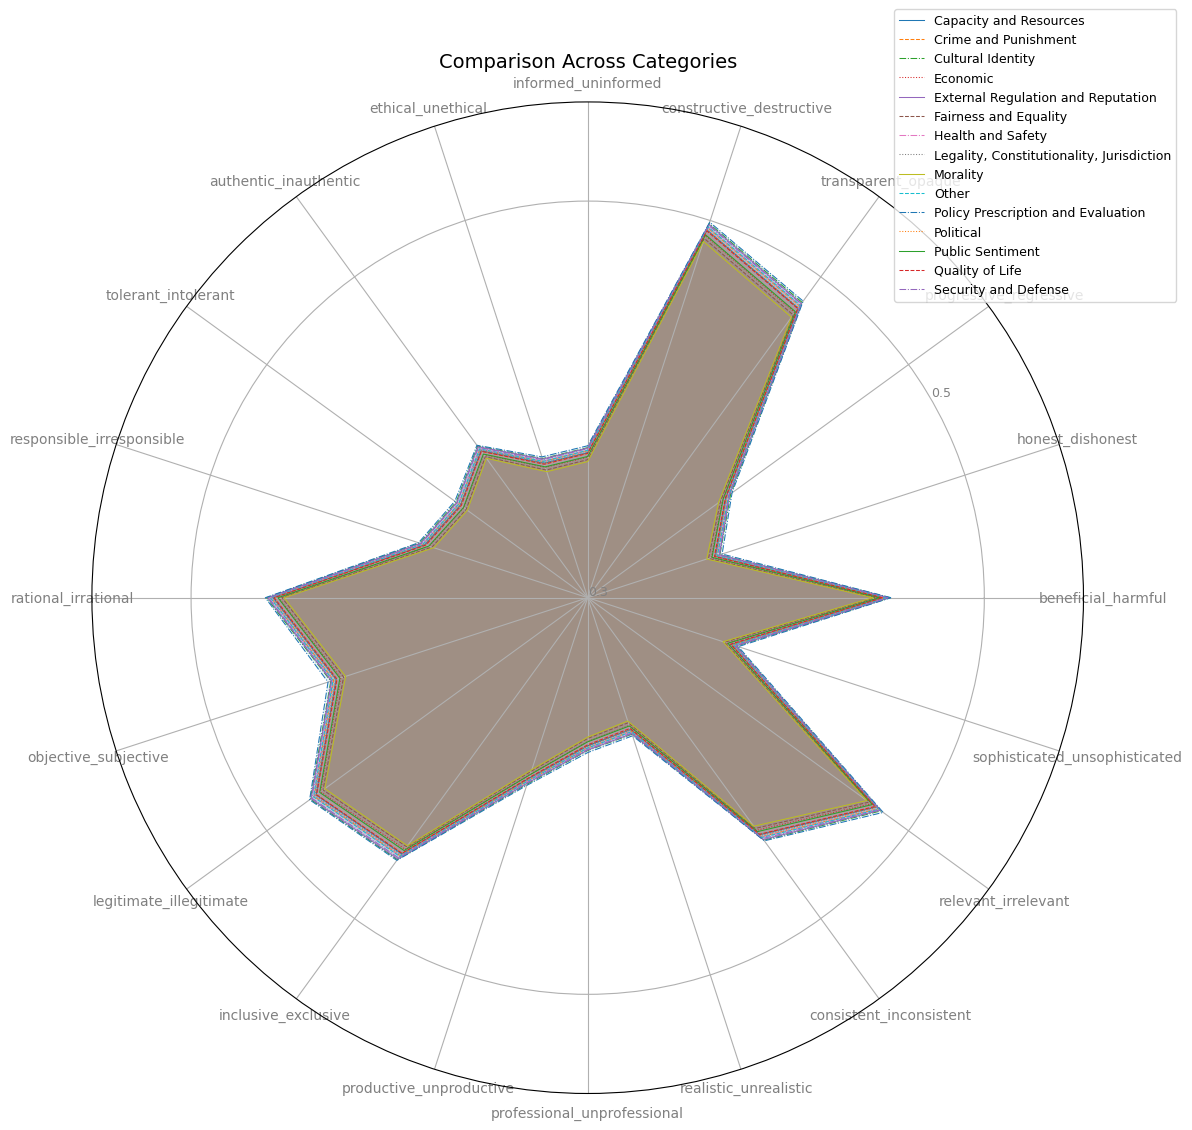

In [108]:
import matplotlib.pyplot as plt
import numpy as np

# copy category_lists_fx to data
data = category_lists_fx.copy()

# Number of variables (attributes)
num_vars = len(attributes)

# Compute angle for each attribute
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Ensure the plot is circular

# Increase the figure size
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))

# Draw one axe per variable and add labels with increased font size and rotation
plt.xticks(angles[:-1], attributes, color='grey', size=10, rotation=45)

# Draw y-labels with increased font size
ax.set_rlabel_position(30)
plt.yticks([0.3, 0.5], ["0.3", "0.5"], color="grey", size=9)
plt.ylim(0.3, 0.55)


# Example of averaging data for each category
for category, arrays in data.items():
    if isinstance(arrays, list):
        # Assuming arrays is a list of arrays, average them
        averaged_array = np.mean(arrays, axis=0)
        data[category] = averaged_array
    elif isinstance(arrays, np.ndarray) and arrays.ndim > 1:
        # If arrays is a 2D numpy array, average across the first dimension
        averaged_array = np.mean(arrays, axis=1)
        data[category] = averaged_array


# Plot each category with reduced line width and different line styles
line_styles = ['-', '--', '-.', ':']
for i, (category, values) in enumerate(data.items()):
    values = np.concatenate((values, [values[0]]))  # Repeat the first value to close the circle
    ax.plot(angles, values, linewidth=0.75, linestyle=line_styles[i % len(line_styles)], label=category)
    ax.fill(angles, values, alpha=0.1)  # Reduced alpha for fill

# Place the legend outside the plot with increased font size
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), fontsize=9)
plt.title("Comparison Across Categories", size=14)
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

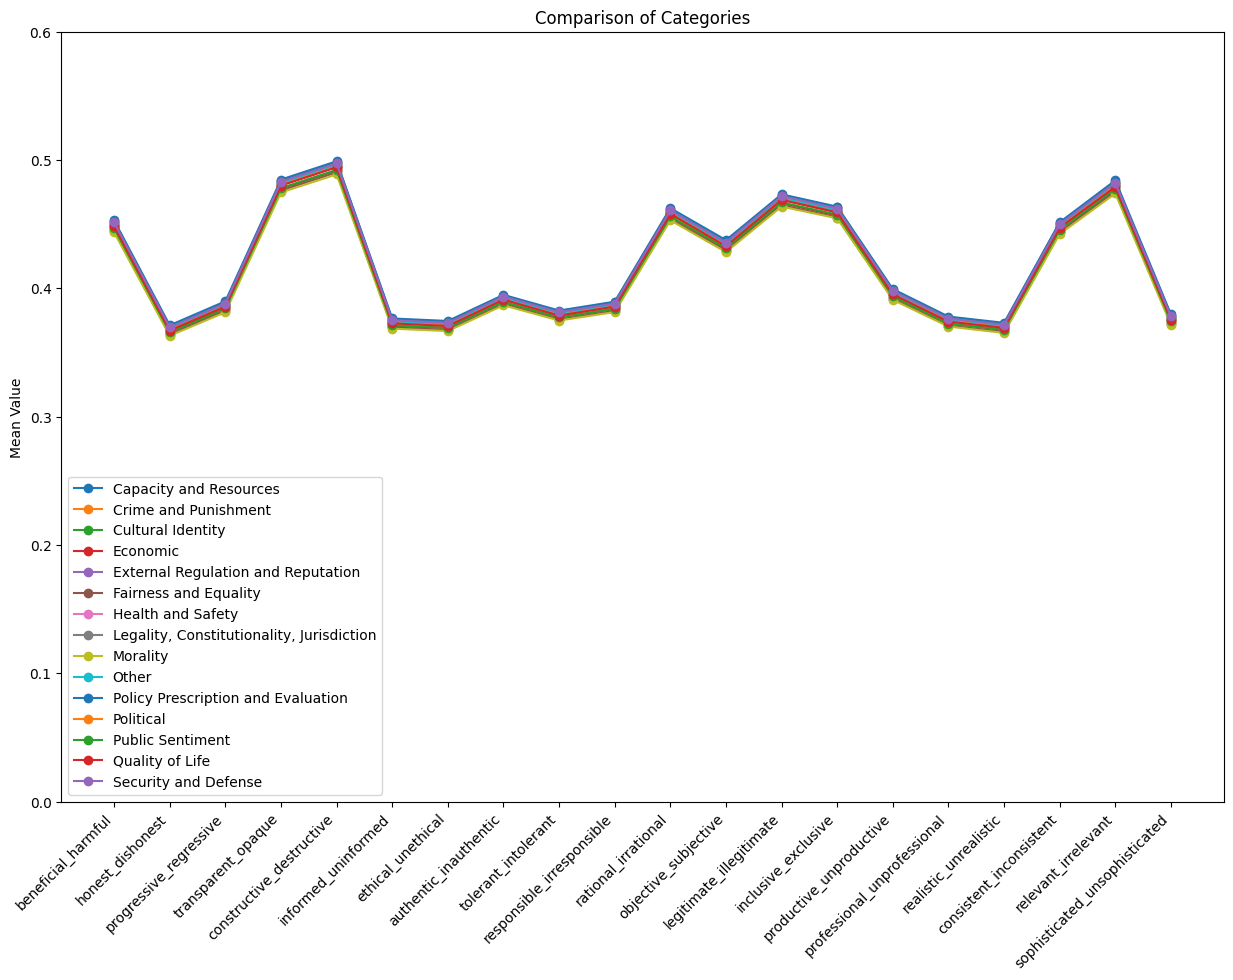

In [109]:
data_fx = category_lists_fx.copy()

# Create a plot for each category
fig, ax = plt.subplots(figsize=(15, 10))

for i, category in enumerate(data_fx.keys()):
    category_mean = np.mean(data_fx[category], axis=0)

    ax.plot(attributes, category_mean, marker='o', label=category)

ax.set_title("Comparison of Categories")
ax.set_ylabel('Mean Value')
ax.set_xticks(range(len(attributes)))
ax.set_xticklabels(attributes, rotation=45, ha="right")
ax.set_ylim(0, 0.6)  # Assuming max value for scaling
ax.legend()

plt.show()

## Single article

In [110]:
import numpy as np

device = 'cuda'

predicted_labels, used_labels_p, used_labels_a0, used_labels_a1 = inspect(model, example_dataloader, device=device)

NameError: name 'example_dataloader' is not defined

In [ ]:
y_columns

: 

In [ ]:
import numpy as np

: 

In [ ]:
# Placeholder functions - you'll need to replace these with your actual functions
def decode_token_ids(token_ids):
    # Replace with your actual tokenizer decode call
    return tokenizer.decode(token_ids, skip_special_tokens=True).strip()

category_colors = {
    'Capacity and Resources': '#FF6F61',  # a vibrant coral
    'Crime and Punishment': '#6B5B95',  # a deep violet
    'Cultural Identity': '#88B04B',  # a leafy green
    'Economic': '#F7CAC9',  # a soft pink
    'External Regulation and Reputation': '#92A8D1',  # a light dusky blue
    'Fairness and Equality': '#955251',  # a warm terra cotta
    'Health and Safety': '#B565A7',  # a muted magenta
    'Legality, Constitutionality, Jurisdiction': '#009B77',  # a medium teal
    'Morality': '#DD4124',  # a bright red-orange
    'Other': '#D2C29D',  # a neutral beige
    'Policy Prescription and Evaluation': '#45B8AC',  # a seafoam green
    'Political': '#EFC050',  # a golden yellow
    'Public Sentiment': '#5B5EA6',  # a mid-tone periwinkle
    'Quality of Life': '#9B2335',  # a rich burgundy
    'Security and Defense': '#DFCFBE',  # a light taupe
}

# Function to color a word based on its category
def color_word(word, category):
    color = category_colors.get(category, 'black')  # Default to black if category not found
    return f'<span style="color: {color};">{word}</span>'


# Function to process and color the article based on predictions
def color_article(article, predicted_labels, used_predicates, used_arg0, used_arg1, y_columns, threshold = 0.8):

    # get col name from 1 hot predicted_labels
    frame = y_columns[np.where(predicted_labels[0] == 1)[0][0]]
    
    # Instead of printing, we'll build an HTML string
    html_output = ""

    # Print the predicted frame with color coding
    frame_color = category_colors.get(frame, 'black')
    html_output += f"<div>Predicted Frame: <span style='color: {frame_color};'>{frame}</span><br></div>"


    # Split article into sentences using NLTK
    sentences = nltk.sent_tokenize(article)
    
    predicted_frames = []

    # Loop through the predictions and color the words accordingly
    for sentence_idx in range(len(sentences)):
        current_sent = sentences[sentence_idx]

        current_predicates = []
        current_arg0s = []
        current_arg1s = []

        for span_idx in range(used_predicates.shape[3]):
            for cat_idx, category in enumerate(y_columns):
                if used_predicates[0][0][sentence_idx][span_idx][cat_idx] > threshold:
                    token_ids = example_dataset[0]["predicate_ids"][sentence_idx][span_idx].int().numpy()
                    decoded_tokens = decode_token_ids(token_ids)
                    decoded_words = decoded_tokens.split()

                    # check if word not empty
                    if decoded_words:
                        predicted_frames.append(category)
                        colored_words = [color_word(word, category) for word in decoded_words]
                        colored_sentence = ' '.join(colored_words)
                        current_predicates.append(colored_sentence)

                if used_arg0[0][0][sentence_idx][span_idx][cat_idx] > threshold:
                    token_ids = example_dataset[0]["arg0_ids"][sentence_idx][span_idx].int().numpy()
                    decoded_tokens = decode_token_ids(token_ids)
                    decoded_words = decoded_tokens.split()
                
                    # check if word not empty
                    if decoded_words:
                        predicted_frames.append(category)
                        colored_words = [color_word(word, category) for word in decoded_words]
                        colored_sentence = ' '.join(colored_words)
                        current_arg0s.append(colored_sentence)

                if used_arg1[0][0][sentence_idx][span_idx][cat_idx] > threshold:
                    token_ids = example_dataset[0]["arg1_ids"][sentence_idx][span_idx].int().numpy()
                    decoded_tokens = decode_token_ids(token_ids)
                    decoded_words = decoded_tokens.split()
                
                    # check if word not empty
                    if decoded_words:
                        predicted_frames.append(category)
                        colored_words = [color_word(word, category) for word in decoded_words]
                        colored_sentence = ' '.join(colored_words)
                        current_arg1s.append(colored_sentence)
        
        # Append to HTML output
        html_output += f"{current_sent} (p: {', '.join(current_predicates)}, a0: {', '.join(current_arg0s)}, a1: {', '.join(current_arg1s)})<br>"

    # Print color legend for used categories
    html_output += "<br><br><div>Color Legend:<br>"

    for category in set(predicted_frames):
        html_output += f"{category}: <span style='color: {category_colors[category]};'>█</span><br>"
    html_output += "</div>"

    return html_output

# Display HTML in Jupyter Notebook
from IPython.display import display, HTML
display(HTML(color_article(example_article, predicted_labels, used_labels_p, used_labels_a0, used_labels_a1, y_columns)))

: 

: 